<a href="https://colab.research.google.com/github/JunhyeongPark-kr/DB-Economy-Competition/blob/main/%08DB_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras-tcn

In [ ]:
# Saving files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import tensorflow as tf
from keras import layers
from tensorflow.keras.models import Model
from keras.layers import Dense, Input

import requests

In [ ]:
print(f"Pandas Ver.: {pd.__version__}")
print(f"NumPy Ver.: {np.__version__}")
print(f"Seaborn Ver.: {sns.__version__}")
print(f"TensorFlow Ver.: {tf.__version__}")
print(f"Requests Ver.: {requests.__version__}")
print(f"Matplotlib Ver.: {matplotlib.__version__}")

Pandas Ver.: 1.5.3
NumPy Ver.: 1.25.2
Seaborn Ver.: 0.13.1
TensorFlow Ver.: 2.15.0
Requests Ver.: 2.31.0
Matplotlib Ver.: 3.7.1


# Energy data


In [ ]:
df_2023mid = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/태양광/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20231130.csv', encoding = 'cp949')



df_2023mid.rename(columns={'거래일자':'date',
                  '거래시간': 'time',
                  '지역명': 'location',
                  '태양광발전량(Mwh)': 'Solar(Mwh)',
                  '풍력발전량(Mwh)': 'Wind(Mwh)',
                  }, inplace = True)
df_2023mid = df_2023mid.fillna(0)

df_2023mid

,date,time,location,Solar(Mwh),Wind(Mwh)
0,2023-09-01,1,경기도,0.029757,0.0
1,2023-09-01,2,경기도,0.000000,0.0
2,2023-09-01,3,경기도,0.000000,0.0
3,2023-09-01,4,경기도,0.000000,0.0
4,2023-09-01,5,경기도,0.000000,0.0
...,...,...,...,...,...
37123,2023-11-30,20,부산시,3.121764,0.0
37124,2023-11-30,21,부산시,2.427456,0.0
37125,2023-11-30,22,부산시,0.612640,0.0
37126,2023-11-30,23,부산시,0.070920,0.0


In [ ]:
df_2023high = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/태양광/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20230630_20230831.csv', encoding='cp949')

df_2023high.rename(columns={'거래일자':'date',
                  '거래시간': 'time',
                  '지역': 'location',
                  '태양광발전량(MWh)': 'Solar(Mwh)',
                  '풍력발전량(MWh)': 'Wind(Mwh)',
                  }, inplace = True)
df_2023high = df_2023high.fillna(0)


df_2023high

,date,time,location,Solar(Mwh),Wind(Mwh)
0,2023-06-01,1,강원도,2.163042,5.431346
1,2023-06-01,2,강원도,1.011176,5.525512
2,2023-06-01,3,강원도,0.692842,6.156516
3,2023-06-01,4,강원도,0.408600,7.257649
4,2023-06-01,5,강원도,0.295672,5.266331
...,...,...,...,...,...
37531,2023-08-31,20,충청북도,33.535854,0.000000
37532,2023-08-31,21,충청북도,16.403392,0.000000
37533,2023-08-31,22,충청북도,5.717837,0.000000
37534,2023-08-31,23,충청북도,2.475347,0.000000


In [ ]:
df_2018 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/태양광/230403_지역별 시간별 태양광 발전량.csv', encoding = 'cp949')

df_2018.rename(columns={'거래일자':'date',
                  '거래시간': 'time',
                  '지역': 'location',
                  ' 태양광 발전량(MWh) ': 'Solar(Mwh)',
                  ' 풍력 발전량(MWh) ': 'Wind(Mwh)',
                  }, inplace = True)
df_2018 = df_2018.fillna(0)


df_2018

,date,time,location,Solar(Mwh),Wind(Mwh)
0,2017-01-01,1,경기도,,0.01
1,2017-01-01,2,경기도,,
2,2017-01-01,3,경기도,,
3,2017-01-01,4,경기도,,0.01
4,2017-01-01,5,경기도,,0.02
...,...,...,...,...,...
917995,2023-02-28,20,부산시,3.59,
917996,2023-02-28,21,부산시,3.46,
917997,2023-02-28,22,부산시,2.71,
917998,2023-02-28,23,부산시,0.82,


In [ ]:
df_2023new = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/태양광/한국전력거래소_지역별 시간별 태양광 발전량_20230301_20230531.csv', encoding = 'cp949')

df_2023new.rename(columns={'거래일자':'date',
                  '거래시간': 'time',
                  '지역': 'location',
                  '  태양광 발전량(MWh)  ': 'Solar(Mwh)',
                  '  풍력 발전량(MWh)  ': 'Wind(Mwh)',
                  }, inplace = True)
df_2023new = df_2023new.fillna(0)


df_2023new

,date,time,location,Solar(Mwh),Wind(Mwh)
0,2023-03-01,1,경기도,1.246789,0.00000
1,2023-03-01,2,경기도,0.452960,0.00000
2,2023-03-01,3,경기도,0.005760,0.00000
3,2023-03-01,4,경기도,0.000000,0.00000
4,2023-03-01,5,경기도,0.000000,0.00144
...,...,...,...,...,...
37531,2023-05-31,20,부산시,3.384451,0.00000
37532,2023-05-31,21,부산시,2.975548,0.00000
37533,2023-05-31,22,부산시,2.209412,0.00000
37534,2023-05-31,23,부산시,0.431920,0.00000


In [ ]:
energy_df = pd.concat([df_2018, df_2023new, df_2023high, df_2023mid], ignore_index=True)
energy_df['datetime'] = pd.to_datetime(energy_df['date']) + pd.to_timedelta(energy_df['time']-1, unit='h')
energy_df.drop(['date', 'time'], axis=1, inplace=True)


energy_df

,location,Solar(Mwh),Wind(Mwh),datetime
0,경기도,,0.01,2017-01-01 00:00:00
1,경기도,,,2017-01-01 01:00:00
2,경기도,,,2017-01-01 02:00:00
3,경기도,,0.01,2017-01-01 03:00:00
4,경기도,,0.02,2017-01-01 04:00:00
...,...,...,...,...
1030195,부산시,3.121764,0.0,2023-11-30 19:00:00
1030196,부산시,2.427456,0.0,2023-11-30 20:00:00
1030197,부산시,0.61264,0.0,2023-11-30 21:00:00
1030198,부산시,0.07092,0.0,2023-11-30 22:00:00


In [ ]:
energy_df['Solar(Mwh)'] = pd.to_numeric(energy_df['Solar(Mwh)'], errors='coerce').fillna(0)
energy_df['Wind(Mwh)'] = pd.to_numeric(energy_df['Wind(Mwh)'], errors='coerce').fillna(0)

columns_order = ['datetime'] + [col for col in energy_df.columns if col != 'datetime']
energy_df = energy_df[columns_order]

energy_df

,datetime,location,Solar(Mwh),Wind(Mwh)
0,2017-01-01 00:00:00,경기도,0.000000,0.01
1,2017-01-01 01:00:00,경기도,0.000000,0.00
2,2017-01-01 02:00:00,경기도,0.000000,0.00
3,2017-01-01 03:00:00,경기도,0.000000,0.01
4,2017-01-01 04:00:00,경기도,0.000000,0.02
...,...,...,...,...
1030195,2023-11-30 19:00:00,부산시,3.121764,0.00
1030196,2023-11-30 20:00:00,부산시,2.427456,0.00
1030197,2023-11-30 21:00:00,부산시,0.612640,0.00
1030198,2023-11-30 22:00:00,부산시,0.070920,0.00


In [ ]:
location_map = {
    '경기도': 'Gyeonggi-do', '강원도': 'Gangwon-do', '경상남도': 'Gyeongsangnam-do',
    '경상북도': 'Gyeongsangbuk-do', '전라남도': 'Jeollanam-do', '전라북도': 'Jeollabuk-do',
    '충청남도': 'Chungcheongnam-do', '충청북도': 'Chungcheongbuk-do', '제주도': 'Jeju-do',
    '서울시': 'Seoul', '인천시': 'Incheon', '대전시': 'Daejeon', '광주시': 'Gwangju',
    '대구시': 'Daegu', '세종시': 'Sejong', '울산시': 'Ulsan', '부산시': 'Busan'
}

def translate_location(df, location_map):
    df['location'] = df['location'].map(location_map)
    return df

energy_df = translate_location(energy_df, location_map)

In [ ]:
energy_df['location'].unique()

array(['Gyeonggi-do', 'Gangwon-do', 'Gyeongsangnam-do',
       'Gyeongsangbuk-do', 'Jeollanam-do', 'Jeollabuk-do',
       'Chungcheongnam-do', 'Chungcheongbuk-do', 'Jeju-do', 'Seoul',
       'Incheon', 'Daejeon', 'Gwangju', 'Daegu', 'Sejong', 'Ulsan',
       'Busan'], dtype=object)

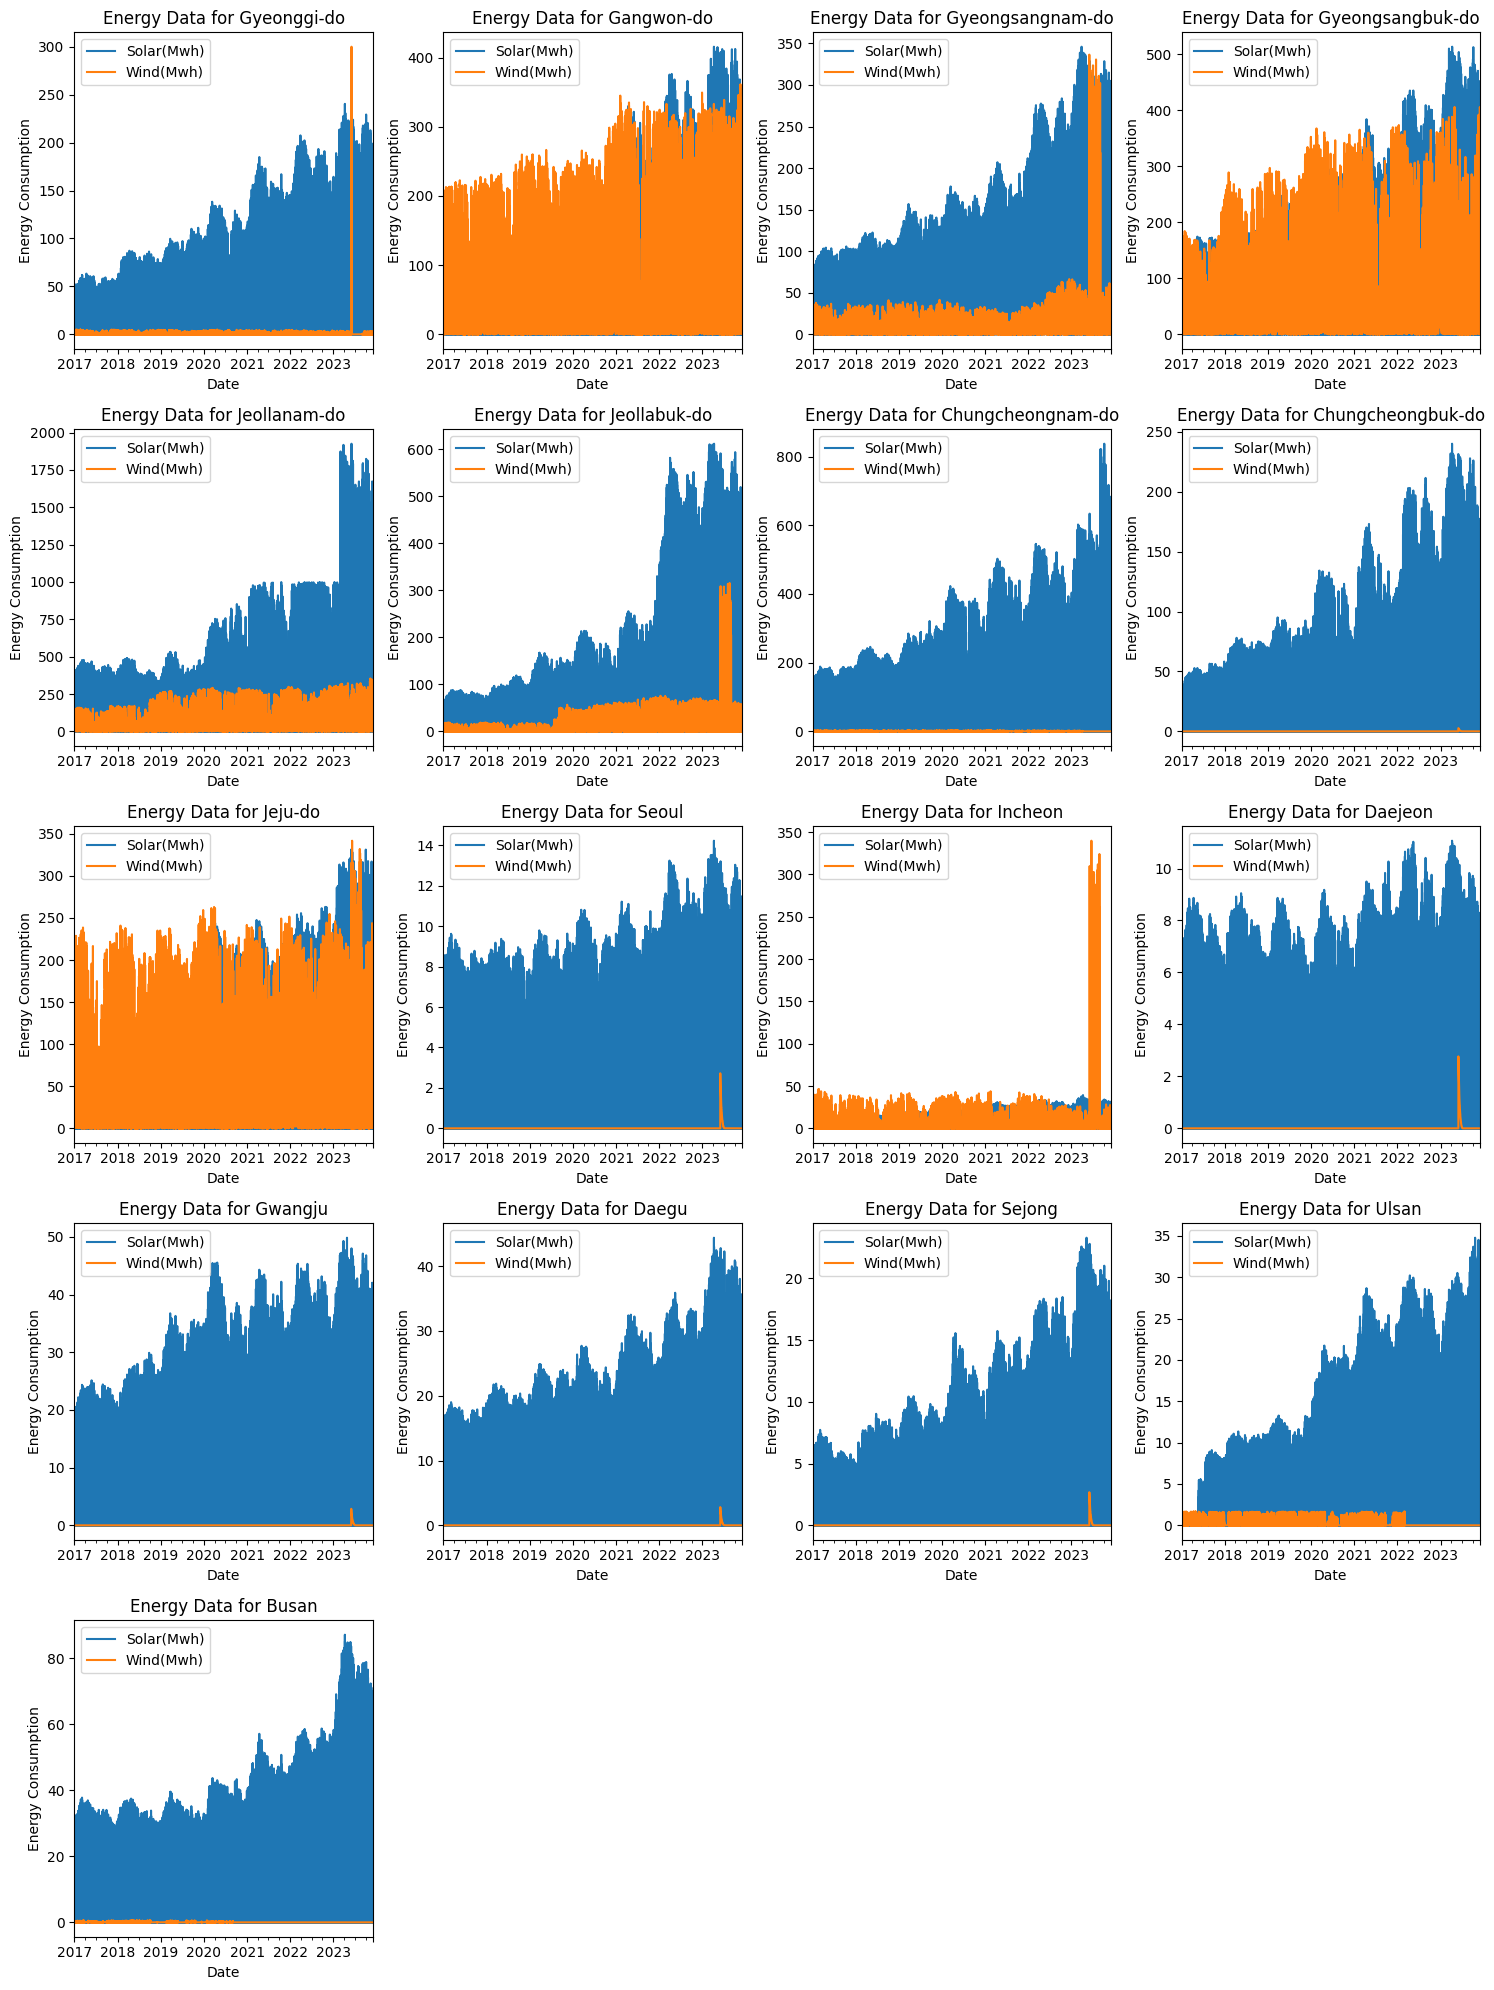

In [ ]:
def process_and_plot_energy_data(df):
    location_dfs = {}

    for location in df['location'].unique():
        location_df = df[df['location'] == location]
        location_df.index = pd.to_datetime(location_df['datetime'])
        location_df = location_df.drop(['datetime', 'location'], axis=1)
        if not location_df.empty:
            location_dfs[location] = location_df

    unique_locations = list(location_dfs.keys())
    n_locations = len(unique_locations)
    n_cols = 4
    n_rows = n_locations // n_cols + (n_locations % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), squeeze=False)
    axes = axes.flatten()

    for i, location in enumerate(unique_locations):
        location_df = location_dfs[location]

        ax = axes[i]
        location_df.plot(ax=ax, title=f"Energy Data for {location}")
        ax.set_ylabel('Energy Consumption')
        ax.set_xlabel('Date')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    return location_dfs

location_energy_dfs = process_and_plot_energy_data(energy_df)


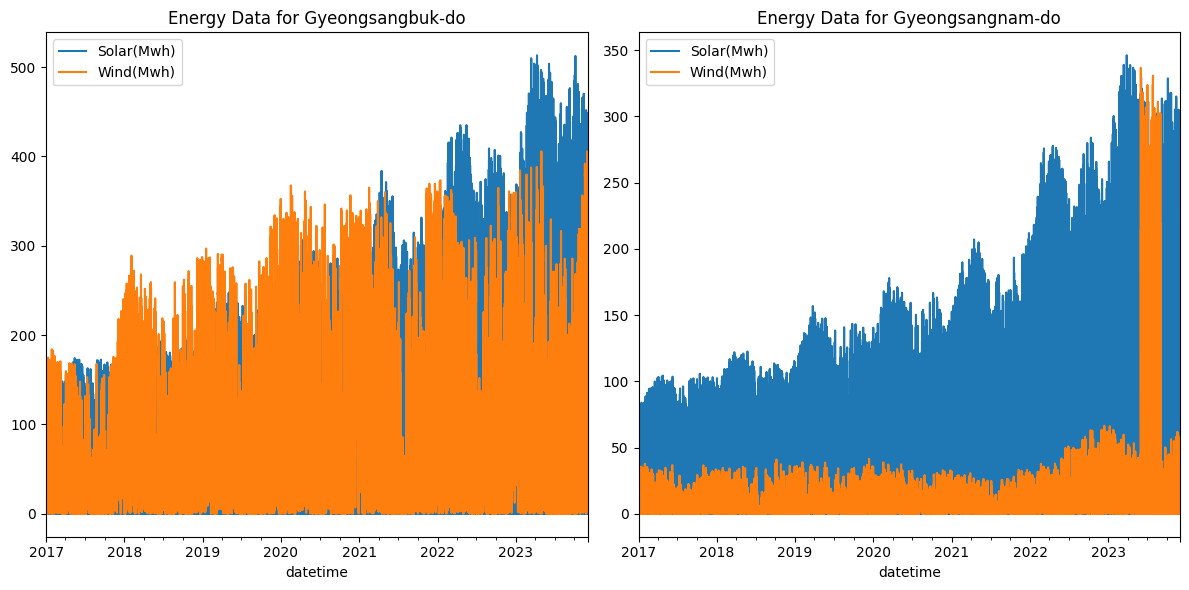

In [ ]:
north_energy_df = energy_df[energy_df['location'] == 'Gyeongsangbuk-do']
north_energy_df.index = north_energy_df['datetime']
north_energy_df = north_energy_df.drop(['datetime'], axis=1)


south_energy_df = energy_df[energy_df['location'] == 'Gyeongsangnam-do']
south_energy_df.index = south_energy_df['datetime']
south_energy_df = south_energy_df.drop(['datetime'], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

north_energy_df.plot(ax=ax[0], title="Energy Data for Gyeongsangbuk-do")

south_energy_df.plot(ax=ax[1], title="Energy Data for Gyeongsangnam-do")

plt.tight_layout()
plt.show()

# Energy_modeling

In [ ]:
south_energy_df

,location,Solar(Mwh),Wind(Mwh)
datetime,,,
2017-01-01 00:00:00,Gyeongsangnam-do,0.000000,19.450000
2017-01-01 01:00:00,Gyeongsangnam-do,0.000000,22.560000
2017-01-01 02:00:00,Gyeongsangnam-do,0.000000,24.250000
2017-01-01 03:00:00,Gyeongsangnam-do,0.000000,19.520000
2017-01-01 04:00:00,Gyeongsangnam-do,0.000000,14.940000
...,...,...,...
2023-11-30 19:00:00,Gyeongsangnam-do,27.038370,54.426291
2023-11-30 20:00:00,Gyeongsangnam-do,21.823950,57.925516
2023-11-30 21:00:00,Gyeongsangnam-do,13.778861,53.153166


In [ ]:
north_energy_df

,location,Solar(Mwh),Wind(Mwh)
datetime,,,
2017-01-01 00:00:00,Gyeongsangbuk-do,0.000000,118.590000
2017-01-01 01:00:00,Gyeongsangbuk-do,0.000000,125.370000
2017-01-01 02:00:00,Gyeongsangbuk-do,0.000000,111.440000
2017-01-01 03:00:00,Gyeongsangbuk-do,0.000000,98.790000
2017-01-01 04:00:00,Gyeongsangbuk-do,0.000000,109.990000
...,...,...,...
2023-11-30 19:00:00,Gyeongsangbuk-do,66.646797,367.041155
2023-11-30 20:00:00,Gyeongsangbuk-do,55.386624,370.821110
2023-11-30 21:00:00,Gyeongsangbuk-do,36.862004,364.724044


In [ ]:
north_energy_df.columns

Index(['location', 'Solar(Mwh)', 'Wind(Mwh)'], dtype='object')

In [ ]:
south_wind = south_energy_df['Wind(Mwh)']
south_solar = south_energy_df['Solar(Mwh)']
north_wind = north_energy_df['Wind(Mwh)']
north_solar = north_energy_df['Solar(Mwh)']

print('South Wind Shape:', south_wind.shape)
print('South Solar Shape:', south_solar.shape)
print('North Wind Shape:', north_wind.shape)
print('North Solar Shape:', north_solar.shape)

South Wind Shape: (60600,)
South Solar Shape: (60600,)
North Wind Shape: (60600,)
North Solar Shape: (60600,)


In [ ]:
south_wind

datetime
2017-01-01 00:00:00    19.450000
2017-01-01 01:00:00    22.560000
2017-01-01 02:00:00    24.250000
2017-01-01 03:00:00    19.520000
2017-01-01 04:00:00    14.940000
                         ...    
2023-11-30 19:00:00    54.426291
2023-11-30 20:00:00    57.925516
2023-11-30 21:00:00    53.153166
2023-11-30 22:00:00    52.081964
2023-11-30 23:00:00    52.832703
Name: Wind(Mwh), Length: 60600, dtype: float64

In [ ]:
south_wind = south_wind.values.reshape(-1, 1)
north_wind = north_wind.values.reshape(-1, 1)
south_solar = south_solar.values.reshape(-1, 1)
north_solar = north_solar.values.reshape(-1, 1)
south_wind

array([[19.45    ],
       [22.56    ],
       [24.25    ],
       ...,
       [53.153166],
       [52.081964],
       [52.832703]])

In [ ]:
from sklearn.model_selection import train_test_split

south_wind_train_data, south_wind_test_data = train_test_split(south_wind, test_size=0.2, shuffle=False)
south_wind_train_data, south_wind_val_data = train_test_split(south_wind_train_data, test_size=0.25, shuffle=False)  # 0.25 x 0.8 = 0.2

north_wind_train_data, north_wind_test_data = train_test_split(north_wind, test_size=0.2, shuffle=False)
north_wind_train_data, north_wind_val_data = train_test_split(north_wind_train_data, test_size=0.25, shuffle=False)  # 0.25 x 0.8 = 0.2

south_solar_train_data, south_solar_test_data = train_test_split(south_solar, test_size=0.2, shuffle=False)
south_solar_train_data, south_solar_val_data = train_test_split(south_solar_train_data, test_size=0.25, shuffle=False)  # 0.25 x 0.8 = 0.2

north_solar_train_data, north_solar_test_data = train_test_split(north_solar, test_size=0.2, shuffle=False)
north_solar_train_data, north_solar_val_data = train_test_split(north_solar_train_data, test_size=0.25, shuffle=False)  # 0.25 x 0.8 = 0.2

print("South wind train shape:", south_wind_train_data.shape)
print("South wind val shape:", south_wind_val_data.shape)
print("South wind test shape:", south_wind_test_data.shape, "\n")

print("North wind train shape:", north_wind_train_data.shape)
print("North wind val shape:", north_wind_val_data.shape)
print("North wind test shape:", north_wind_test_data.shape, "\n")

print("South solar train shape:", south_solar_train_data.shape)
print("South solar val shape:", south_solar_val_data.shape)
print("South solar test shape:", south_solar_test_data.shape, "\n")

print("North solar train shape:", north_solar_train_data.shape)
print("North solar val shape:", north_solar_val_data.shape)
print("North solar test shape:", north_solar_test_data.shape, "\n")

South wind train shape: (36360, 1)
South wind val shape: (12120, 1)
South wind test shape: (12120, 1) 

North wind train shape: (36360, 1)
North wind val shape: (12120, 1)
North wind test shape: (12120, 1) 

South solar train shape: (36360, 1)
South solar val shape: (12120, 1)
South solar test shape: (12120, 1) 

North solar train shape: (36360, 1)
North solar val shape: (12120, 1)
North solar test shape: (12120, 1) 



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

scaler = MinMaxScaler(feature_range=(0, 1))

south_wind_train_scaled = scaler.fit_transform(south_wind_train_data)
south_wind_val_scaled = scaler.transform(south_wind_val_data)
south_wind_test_scaled = scaler.transform(south_wind_test_data)

north_wind_train_scaled = scaler.fit_transform(north_wind_train_data)
north_wind_val_scaled = scaler.transform(north_wind_val_data)
north_wind_test_scaled = scaler.transform(north_wind_test_data)

south_solar_train_scaled = scaler.fit_transform(south_solar_train_data)
south_solar_val_scaled = scaler.transform(south_solar_val_data)
south_solar_test_scaled = scaler.transform(south_solar_test_data)

north_solar_train_scaled = scaler.fit_transform(north_solar_train_data)
north_solar_val_scaled = scaler.transform(north_solar_val_data)
north_solar_test_scaled = scaler.transform(north_solar_test_data)

# Parameters for LSTM model
window_size = 24  # Number of time steps in each input sample
batch_size = 64  # Batch size for training

south_wind_train_generator = TimeseriesGenerator(south_wind_train_scaled, south_wind_train_scaled,
                                      length=window_size, batch_size=batch_size)
south_wind_val_generator = TimeseriesGenerator(south_wind_val_scaled, south_wind_val_scaled,
                                    length=window_size, batch_size=batch_size)

north_wind_train_generator = TimeseriesGenerator(north_wind_train_scaled, north_wind_train_scaled,
                                      length=window_size, batch_size=batch_size)
north_wind_val_generator = TimeseriesGenerator(north_wind_val_scaled, north_wind_val_scaled,
                                    length=window_size, batch_size=batch_size)

south_solar_train_generator = TimeseriesGenerator(south_solar_train_scaled, south_solar_train_scaled,
                                      length=window_size, batch_size=batch_size)
south_solar_val_generator = TimeseriesGenerator(south_solar_val_scaled, south_solar_val_scaled,
                                    length=window_size, batch_size=batch_size)

north_solar_train_generator = TimeseriesGenerator(north_solar_train_scaled, north_solar_train_scaled,
                                      length=window_size, batch_size=batch_size)
north_solar_val_generator = TimeseriesGenerator(north_solar_val_scaled, north_solar_val_scaled,
                                    length=window_size, batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

# South Wind Model
south_wind_model = Sequential([
    InputLayer(input_shape=(window_size, 1), name='input_layer_south_wind'),
    LSTM(256, name='lstm_south_wind'),
    Dense(64, activation='relu', name='dense1_south_wind'),
    Dense(1, activation='linear', name='output_layer_south_wind')
], name='South_Wind_Model')

# South Solar Model
south_solar_model = Sequential([
    InputLayer(input_shape=(window_size, 1), name='input_layer_south_solar'),
    LSTM(256, name='lstm_south_solar'),
    Dense(128, activation='relu', name='dense1_south_solar'),
    Dense(1, activation='linear', name='output_layer_south_solar')
], name='South_Solar_Model')

# North Wind Model
north_wind_model = Sequential([
    InputLayer(input_shape=(window_size, 1), name='input_layer_north_wind'),
    LSTM(256, name='lstm_north_wind'),
    Dropout(0.2),
    Dense(128, activation='relu', name='dense1_north_wind'),
    Dropout(0.2),
    Dense(64, activation='relu', name='dense2_north_wind'),
    Dense(1, activation='linear', name='output_layer_north_wind')
], name='North_Wind_Model')

# North Solar Model
north_solar_model = Sequential([
    InputLayer(input_shape=(window_size, 1), name='input_layer_north_solar'),
    LSTM(256, name='lstm_north_solar'),
    Dropout(0.2),
    Dense(128, activation='relu', name='dense1_north_solar'),
    Dropout(0.2),
    Dense(64, activation='relu', name='dense2_north_solar'),
    Dense(1, activation='linear', name='output_layer_north_solar')
], name='North_Solar_Model')

south_wind_model.summary()
print('\n')
south_solar_model.summary()
print('\n')
north_wind_model.summary()
print('\n')
north_solar_model.summary()

Model: "South_Wind_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_south_wind (LSTM)      (None, 256)               264192    
                                                                 
 dense1_south_wind (Dense)   (None, 64)                16448     
                                                                 
 output_layer_south_wind (D  (None, 1)                 65        
 ense)                                                           
                                                                 
Total params: 280705 (1.07 MB)
Trainable params: 280705 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "South_Solar_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_south_solar (LSTM)     (None, 256)           

In [ ]:
cp1 = ModelCheckpoint('/content/drive/MyDrive/DB Economy Competition/south_wind_model/', save_best_only=True)
cp2 = ModelCheckpoint('/content/drive/MyDrive/DB Economy Competition/south_solar_model/', save_best_only=True)
cp3 = ModelCheckpoint('/content/drive/MyDrive/DB Economy Competition/north_wind_model/', save_best_only=True)
cp4 = ModelCheckpoint('/content/drive/MyDrive/DB Economy Competition/north_solar_model/', save_best_only=True)

south_wind_model.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
south_solar_model.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
north_wind_model.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
north_solar_model.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
south_wind_history = south_wind_model.fit(
    south_wind_train_generator,
    validation_data=south_wind_val_generator,
    epochs=20,
    callbacks=[cp1])

south_wind_model.save('/content/drive/MyDrive/DB Economy Competition/south_wind_model.h5')

Epoch 1/20
568/568 [==============================] - 12s 15ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884
Epoch 2/20
568/568 [==============================] - 6s 11ms/step - loss: 0.0063 - root_mean_squared_error: 0.0791 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0726
Epoch 3/20
568/568 [==============================] - 8s 13ms/step - loss: 0.0050 - root_mean_squared_error: 0.0706 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0675
Epoch 4/20
568/568 [==============================] - 8s 13ms/step - loss: 0.0042 - root_mean_squared_error: 0.0651 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0632
Epoch 5/20
568/568 [==============================] - 7s 13ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0615
Epoch 6/20
568/568 [==============================] - 4s 6ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.0041 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
south_solar_history = south_solar_model.fit(
    south_solar_train_generator,
    validation_data=south_solar_val_generator,
    epochs=20,
    callbacks=[cp2])

south_solar_model.save('/content/drive/MyDrive/DB Economy Competition/south_solar_model.h5')

Epoch 1/20
568/568 [==============================] - 10s 15ms/step - loss: 0.0105 - root_mean_squared_error: 0.1027 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1114
Epoch 2/20
568/568 [==============================] - 6s 11ms/step - loss: 0.0042 - root_mean_squared_error: 0.0652 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0976
Epoch 3/20
568/568 [==============================] - 8s 13ms/step - loss: 0.0033 - root_mean_squared_error: 0.0578 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798
Epoch 4/20
568/568 [==============================] - 7s 12ms/step - loss: 0.0024 - root_mean_squared_error: 0.0492 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0778
Epoch 5/20
568/568 [==============================] - 6s 11ms/step - loss: 0.0019 - root_mean_squared_error: 0.0436 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 6/20
568/568 [==============================] - 7s 13ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0039

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
north_wind_history = north_wind_model.fit(
    north_wind_train_generator,
    validation_data=north_wind_val_generator,
    epochs=20,
    callbacks=[cp3])

north_wind_model.save('/content/drive/MyDrive/DB Economy Competition/north_wind_model.h5')

Epoch 1/20
568/568 [==============================] - 14s 18ms/step - loss: 0.0109 - root_mean_squared_error: 0.1044 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 2/20
568/568 [==============================] - 8s 14ms/step - loss: 0.0042 - root_mean_squared_error: 0.0651 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623
Epoch 3/20
568/568 [==============================] - 7s 13ms/step - loss: 0.0034 - root_mean_squared_error: 0.0580 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0567
Epoch 4/20
568/568 [==============================] - 8s 14ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542
Epoch 5/20
568/568 [==============================] - 8s 14ms/step - loss: 0.0026 - root_mean_squared_error: 0.0515 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0523
Epoch 6/20
568/568 [==============================] - 8s 14ms/step - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0026

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
north_solar_history = north_solar_model.fit(
    north_solar_train_generator,
    validation_data=north_solar_val_generator,
    epochs=20,
    callbacks=[cp4])

north_solar_model.save('/content/drive/MyDrive/DB Economy Competition/north_solar_model.h5')

Epoch 1/20
568/568 [==============================] - 12s 14ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1032
Epoch 2/20
568/568 [==============================] - 8s 14ms/step - loss: 0.0044 - root_mean_squared_error: 0.0665 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0909
Epoch 3/20
568/568 [==============================] - 8s 14ms/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806
Epoch 4/20
568/568 [==============================] - 7s 12ms/step - loss: 0.0030 - root_mean_squared_error: 0.0546 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 5/20
568/568 [==============================] - 8s 15ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 6/20
568/568 [==============================] - 7s 13ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0042

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

def generate_predictions(model_path, generator):
    model = load_model(model_path)

    predictions = []
    actuals = []
    for i in range(len(generator)):
        x, y = generator[i]
        pred = model.predict(x).flatten()
        predictions.extend(pred)
        actuals.extend(y)

    return predictions, actuals

predictions_south_wind, actuals_south_wind = generate_predictions('/content/drive/MyDrive/DB Economy Competition/south_wind_model.h5', south_wind_train_generator)
predictions_south_solar, actuals_south_solar = generate_predictions('/content/drive/MyDrive/DB Economy Competition/south_solar_model.h5', south_solar_train_generator)
predictions_north_wind, actuals_north_wind = generate_predictions('/content/drive/MyDrive/DB Economy Competition/north_wind_model.h5', north_wind_train_generator)
predictions_north_solar, actuals_north_solar = generate_predictions('/content/drive/MyDrive/DB Economy Competition/north_solar_model.h5', north_solar_train_generator)

df_south_wind = pd.DataFrame({'Train Predictions': predictions_south_wind, 'Actuals': actuals_south_wind})
df_south_solar = pd.DataFrame({'Train Predictions': predictions_south_solar, 'Actuals': actuals_south_solar})
df_north_wind = pd.DataFrame({'Train Predictions': predictions_north_wind, 'Actuals': actuals_north_wind})
df_north_solar = pd.DataFrame({'Train Predictions': predictions_north_solar, 'Actuals': actuals_north_solar})

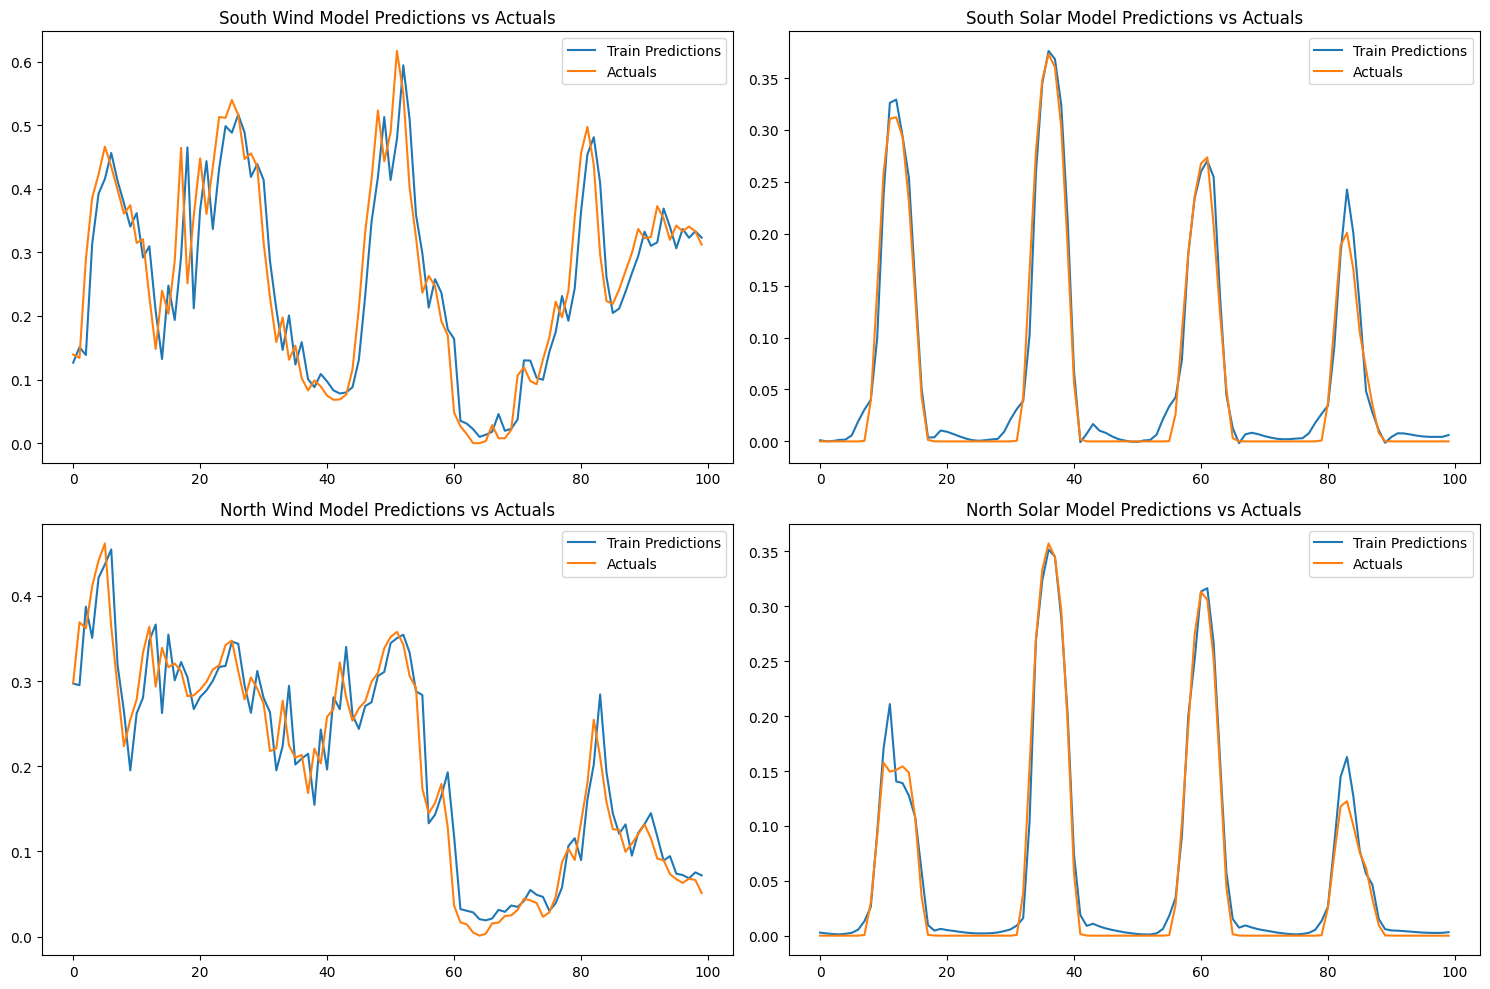

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(df_south_wind['Train Predictions'][:100], label='Train Predictions')
axs[0, 0].plot(df_south_wind['Actuals'][:100], label='Actuals')
axs[0, 0].set_title('South Wind Model Predictions vs Actuals')
axs[0, 0].legend()

axs[0, 1].plot(df_south_solar['Train Predictions'][:100], label='Train Predictions')
axs[0, 1].plot(df_south_solar['Actuals'][:100], label='Actuals')
axs[0, 1].set_title('South Solar Model Predictions vs Actuals')
axs[0, 1].legend()

axs[1, 0].plot(df_north_wind['Train Predictions'][:100], label='Train Predictions')
axs[1, 0].plot(df_north_wind['Actuals'][:100], label='Actuals')
axs[1, 0].set_title('North Wind Model Predictions vs Actuals')
axs[1, 0].legend()

axs[1, 1].plot(df_north_solar['Train Predictions'][:100], label='Train Predictions')
axs[1, 1].plot(df_north_solar['Actuals'][:100], label='Actuals')
axs[1, 1].set_title('North Solar Model Predictions vs Actuals')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

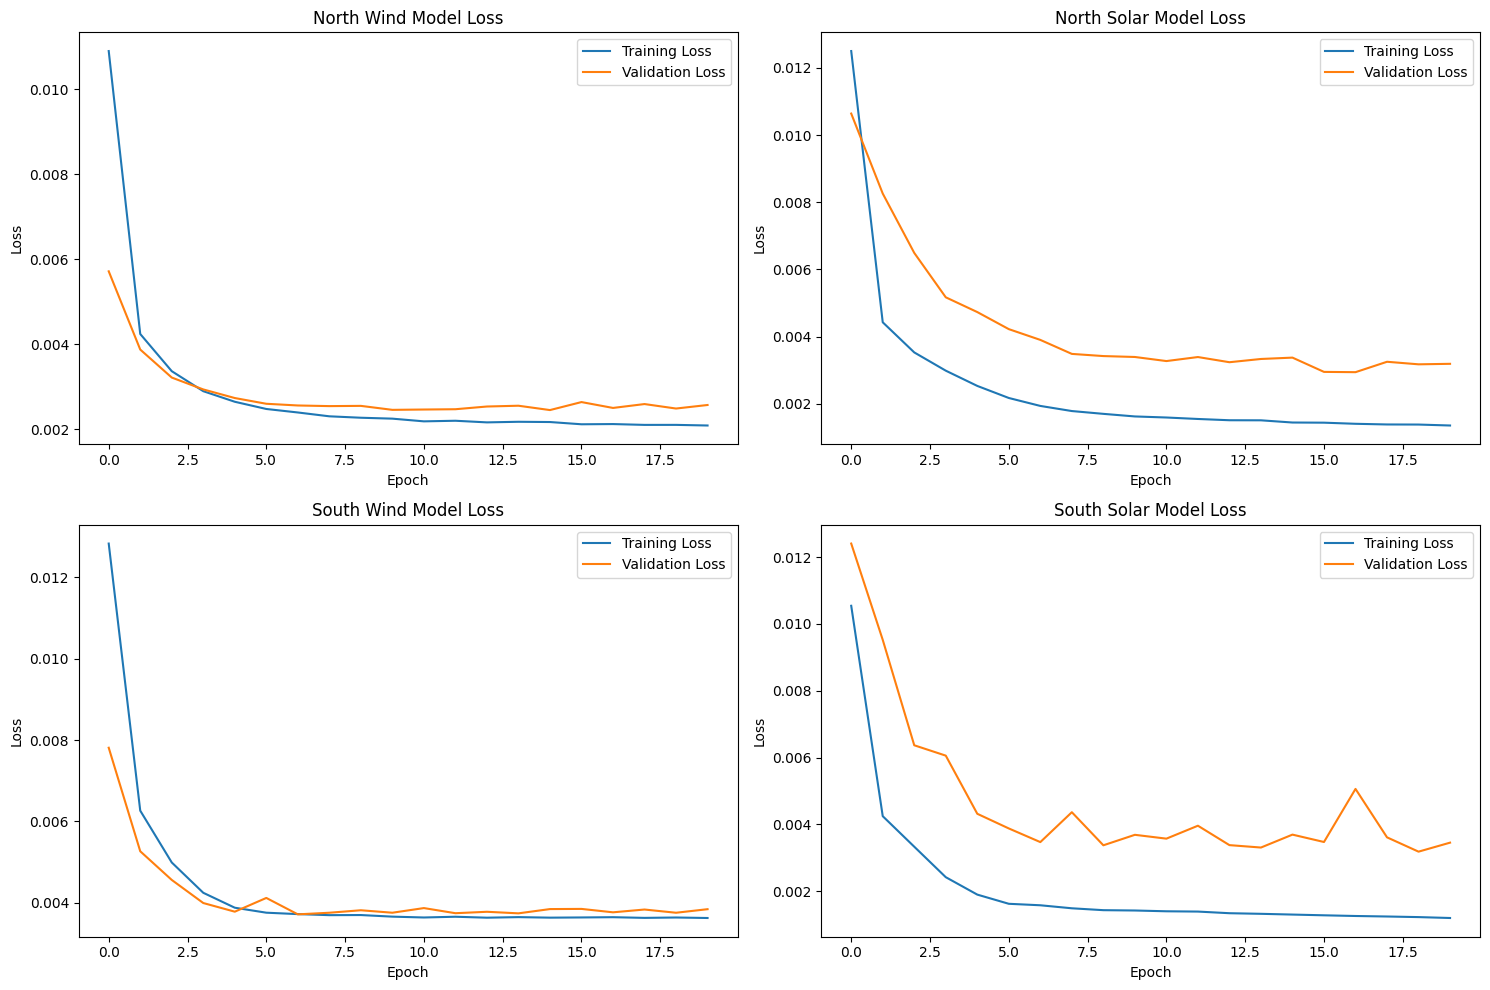

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(north_wind_history.history['loss'], label='Training Loss')
axs[0, 0].plot(north_wind_history.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title('North Wind Model Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

axs[0, 1].plot(north_solar_history.history['loss'], label='Training Loss')
axs[0, 1].plot(north_solar_history.history['val_loss'], label='Validation Loss')
axs[0, 1].set_title('North Solar Model Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

axs[1, 0].plot(south_wind_history.history['loss'], label='Training Loss')
axs[1, 0].plot(south_wind_history.history['val_loss'], label='Validation Loss')
axs[1, 0].set_title('South Wind Model Loss')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

axs[1, 1].plot(south_solar_history.history['loss'], label='Training Loss')
axs[1, 1].plot(south_solar_history.history['val_loss'], label='Validation Loss')
axs[1, 1].set_title('South Solar Model Loss')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [ ]:
yeongju_energy_df = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/경상북도 영주시_태양광발전사업허가현황_20220317.csv', encoding = 'cp949')
euiryeong_energy_df = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/경상남도 의령군_태양관 발전소 설치현황_20230411.csv', encoding = 'cp949')

In [ ]:
yeongju_energy_df

,발전소명,설치장소,설치위치,설비용량(kw),허가일,사업개시일,데이터기준일
0,영주태양광발전소,경상북도 영주시 안정면 동촌리 76,토지위,50.00,2006-03-24,2006-03-24,2022-03-17
1,(주)쏠라지티,경상북도 영주시 부석면 노곡리 산86,토지위,199.00,2006-06-14,2006-06-14,2022-03-17
2,(주)에너지라이트,경상북도 영주시 부석면 노곡리 산86,토지위,199.00,2006-06-14,2006-06-14,2022-03-17
3,썬샤인에너지(주),경상북도 영주시 안정면 동촌리 39번지 외 2필지,토지위,600.00,2006-10-11,2007-07-18,2022-03-17
4,(주)삼진태양광발전소,경상북도 영주시 문수면 만방리 산225,토지위,500.00,2007-04-18,2008-07-23,2022-03-17
...,...,...,...,...,...,...,...
1581,용혈4호태양광발전소,경상북도 영주시 평은면 용혈리 22번지(토지 위),토지위,299.60,2022-03-17,NaN,2022-03-17
1582,동천2호태양광발전소,경상북도 영주시 장수면 소룡리 362번지(건물 위),건물위,99.84,2022-03-17,NaN,2022-03-17
1583,동천3호태양광발전소,경상북도 영주시 장수면 소룡리 362번지(건물 위),건물위,97.92,2022-03-17,NaN,2022-03-17
1584,창후태양광발전소,경상북도 영주시 장수면 성곡리 10번지(토지 위),토지위,99.84,2022-03-17,NaN,2022-03-17


In [ ]:
euiryeong_energy_df

,순번,상호,설치장소소재지 주소,설비용량(KW),허가일자,사업개시일,데이터기준일
0,1,ENL 52호 태양광발전소,경상남도 의령군 부림면 한지20길 39-42,359.70,2023-01-16,NaN,2023-04-11
1,2,대0헌2 태양광발전소,경상남도 의령군 의령읍 벽화로 418-57,19.64,2022-11-14,NaN,2023-04-11
2,3,정0환 태양광발전소,경상남도 의령군 부림면 손오로 267-2,99.96,2022-11-14,NaN,2023-04-11
3,4,권0희 태양광발전소,"경상남도 의령군 부림면 손오로1길 52, 경산농산",99.96,2022-11-11,NaN,2023-04-11
4,5,대원2호 태양광발전소,경상남도 의령군 유곡면 마장로 35-5,45.78,2022-11-10,NaN,2023-04-11
...,...,...,...,...,...,...,...
403,404,0규태양광발전소,경상남도 의령군 의령읍 대산리 산 97,96.00,2014-08-20,NaN,2023-04-11
404,405,중동태양광발전소 3호(케이제이에너지주식회사),경상남도 의령군 의령읍 의령대로 1497,250.00,2014-05-20,NaN,2023-04-11
405,406,대의태양광발전소제1호,경상남도 의령군 대의면 하촌리 산 15번지,996.00,2018-08-03,NaN,2023-04-11
406,407,유진엘링 제2 태양광발전소,경상남도 의령군 부림면 의합대로 2568-18,99.00,2012-07-04,NaN,2023-04-11


In [ ]:
yeongju_energy_df['면'] = yeongju_energy_df['설치장소'].apply(lambda x: x.split()[2])

yeongju_energy_grouped_df = yeongju_energy_df.groupby('면')[' 설비용량(kw)'].sum().reset_index()

yeongju_energy_grouped_df.mean()

<ipython-input-13-f44f7c0b533a>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  yeongju_energy_grouped_df.mean()


 설비용량(kw)    10348.714172
dtype: float64

In [ ]:
euiryeong_energy_df['면'] = euiryeong_energy_df['설치장소소재지 주소 '].apply(lambda x: x.split()[2])

euiryeong_energy_grouped_df = euiryeong_energy_df.groupby('면')['설비용량(KW)'].sum().reset_index()

euiryeong_energy_grouped_df

,면,설비용량(KW)
0,가례면,832.16
1,궁류면,3102.66
2,낙서면,3416.03
3,대의면,15435.26
4,봉수면,4608.05
5,부림면,10796.19
6,용덕면,13525.41
7,유곡면,21496.73
8,의령읍,6292.15
9,정곡면,14732.63


In [ ]:
!sudo apt-get install -y fonts-nanum


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [ ]:
!rm ~/.cache/matplotlib -rf


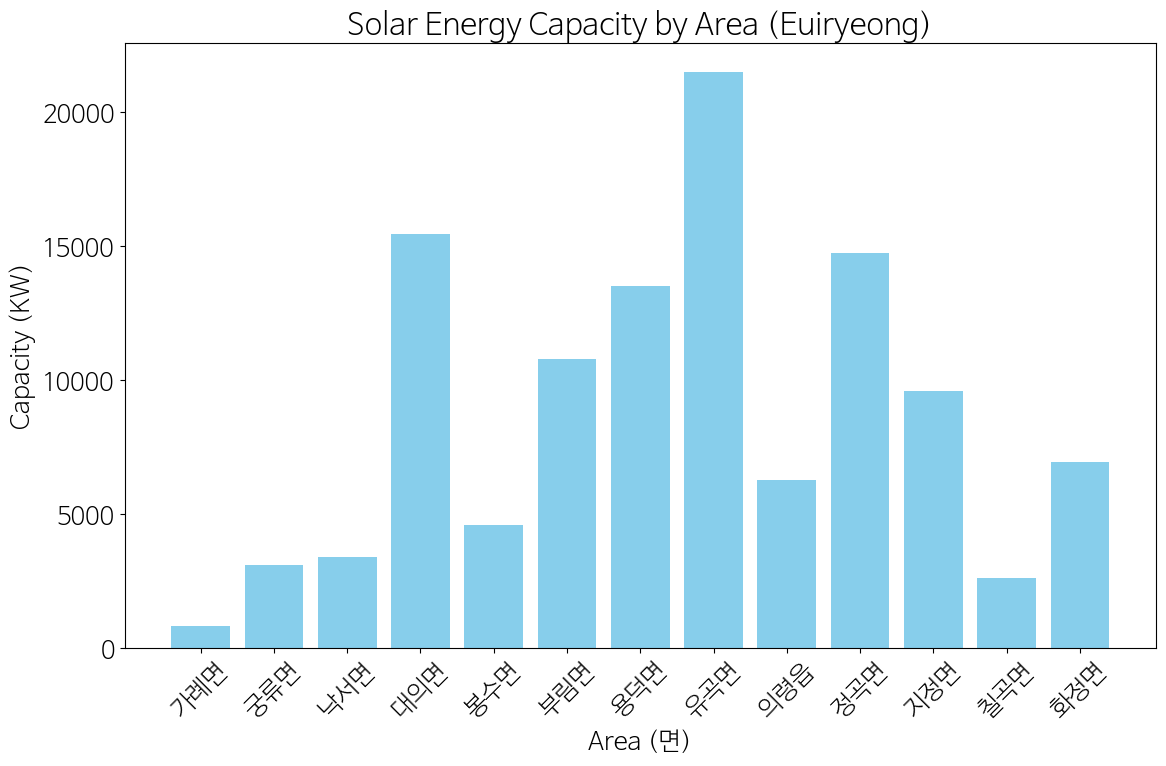

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager as fm

fe = fm.FontEntry(
    fname=r'/content/drive/MyDrive/DB Economy Competition/NanumBarunGothicLightSubset.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

plt.figure(figsize=(12, 8))
plt.bar(euiryeong_energy_grouped_df["면"], euiryeong_energy_grouped_df["설비용량(KW)"], color='skyblue')
plt.xlabel("Area (면)")
plt.ylabel("Capacity (KW)")
plt.title("Solar Energy Capacity by Area (Euiryeong)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


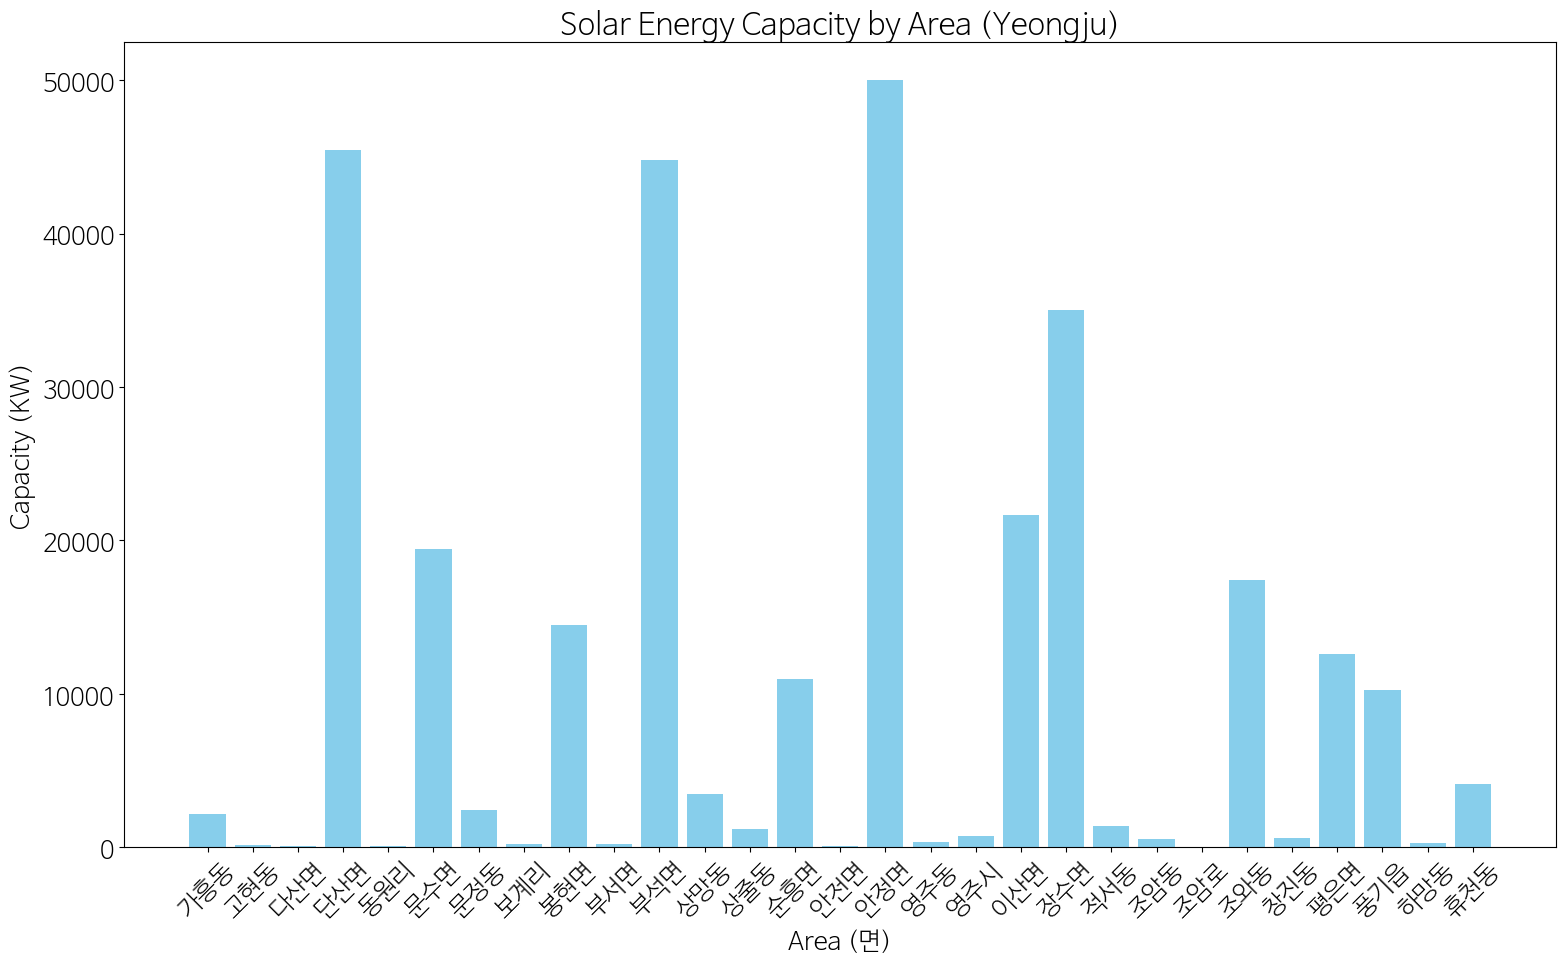

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager as fm

fe = fm.FontEntry(
    fname=r'/content/drive/MyDrive/DB Economy Competition/NanumBarunGothicLightSubset.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

plt.figure(figsize=(16, 10))
plt.bar(yeongju_energy_grouped_df["면"], yeongju_energy_grouped_df[" 설비용량(kw)"], color='skyblue')
plt.xlabel("Area (면)")
plt.ylabel("Capacity (KW)")
plt.title("Solar Energy Capacity by Area (Yeongju)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Weather_data


In [ ]:
asos_2017 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2017.csv', encoding = 'cp949')
asos_2018 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2018.csv', encoding = 'cp949')
asos_2019 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2019.csv', encoding = 'cp949')
asos_2020 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2020.csv', encoding = 'cp949')
asos_2021 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2021.csv', encoding = 'cp949')
asos_2022 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2022.csv', encoding = 'cp949')
asos_2023 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2023.csv', encoding = 'cp949')

asos_df = pd.concat([asos_2017, asos_2018, asos_2019, asos_2020, asos_2021, asos_2022, asos_2023], ignore_index=True)

asos_df['일시'] = pd.to_datetime(asos_df['일시'])
asos_df.drop([
    '기온 QC플래그',
    '강수량 QC플래그',
    '풍속 QC플래그',
    '풍향 QC플래그',
    '습도 QC플래그',
    '현지기압 QC플래그',
    '해면기압 QC플래그',
    '일조 QC플래그',
    '일사 QC플래그',
    '지면상태(지면상태코드)',
    '현상번호(국내식)',
    '운형(운형약어)',
    '지면온도 QC플래그'], axis = 1, inplace=True)

<ipython-input-6-20e6890b500e>:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  asos_2017 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2017.csv', encoding = 'cp949')
<ipython-input-6-20e6890b500e>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  asos_2018 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2018.csv', encoding = 'cp949')
<ipython-input-6-20e6890b500e>:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  asos_2019 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2019.csv', encoding = 'cp949')
<ipython-input-6-20e6890b500e>:4: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  asos_2020 = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/ASOS/ASOS_2020.csv', encoding = 'cp949')
<ipy

In [ ]:
asos_df.rename(columns={
    '지점': 'location',
    '지점명': 'location_name',
    '일시': 'datetime',
    '기온(°C)': 'temp(°C)',
    '강수량(mm)': 'rain(mm)',
    '풍속(m/s)': 'wind_speed(m/s)',
    '풍향(16방위)': 'wind_direction(16pts)',
    '습도(%)': 'humidity(%)',
    '증기압(hPa)': 'vapor_pressure(hPa)',
    '이슬점온도(°C)': 'dew_point_temp(°C)',
    '현지기압(hPa)': 'local_pressure(hPa)',
    '해면기압(hPa)': 'sea_level_pressure(hPa)',
    '일조(hr)': 'sunshine(hr)',
    '일사(MJ/m2)': 'solar_radiation(MJ/m2)',
    '적설(cm)': 'snowfall(cm)',
    '3시간신적설(cm)': 'new_snowfall_3hr(cm)',
    '전운량(10분위)': 'total_cloud_cover(1/10)',
    '중하층운량(10분위)': 'low_mid_cloud_cover(1/10)',
    '최저운고(100m )': 'lowest_cloud_height(100m)',
    '시정(10m)': 'visibility(10m)',
    '지면온도(°C)': 'ground_temp(°C)',
    '5cm 지중온도(°C)': 'soil_temp_5cm(°C)',
    '10cm 지중온도(°C)': 'soil_temp_10cm(°C)',
    '20cm 지중온도(°C)': 'soil_temp_20cm(°C)',
    '30cm 지중온도(°C)': 'soil_temp_30cm(°C)'
                  }, inplace = True)

asos_df.fillna(0, inplace=True)
asos_df

,location,location_name,datetime,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),...,new_snowfall_3hr(cm),total_cloud_cover(1/10),low_mid_cloud_cover(1/10),lowest_cloud_height(100m),visibility(10m),ground_temp(°C),soil_temp_5cm(°C),soil_temp_10cm(°C),soil_temp_20cm(°C),soil_temp_30cm(°C)
0,115,울릉도,2017-01-01 00:00:00,5.1,0.0,1.5,230.0,52.0,4.6,-3.9,...,0.0,5.0,5.0,11.0,2000.0,0.1,3.4,4.1,4.5,4.5
1,115,울릉도,2017-01-01 01:00:00,4.8,0.0,1.1,230.0,53.0,4.6,-3.9,...,0.0,0.0,1.0,0.0,2000.0,0.0,3.2,4.0,4.5,4.4
2,115,울릉도,2017-01-01 02:00:00,4.7,0.0,1.6,200.0,51.0,4.4,-4.5,...,0.0,0.0,0.0,0.0,2000.0,0.0,3.1,3.9,4.5,4.4
3,115,울릉도,2017-01-01 03:00:00,4.6,0.0,1.0,180.0,52.0,4.4,-4.4,...,0.0,2.0,2.0,11.0,2000.0,-0.2,2.9,3.7,4.4,4.3
4,115,울릉도,2017-01-01 04:00:00,4.6,0.0,1.1,180.0,51.0,4.3,-4.6,...,0.0,1.0,1.0,10.0,2000.0,-0.2,2.9,3.6,4.3,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717553,295,남해,2023-12-31 19:00:00,6.0,0.0,2.1,320.0,66.0,6.2,0.1,...,0.0,0.0,0.0,0.0,1480.0,2.5,0.0,0.0,0.0,0.0
1717554,295,남해,2023-12-31 20:00:00,4.2,0.0,1.3,290.0,74.0,6.1,0.0,...,0.0,0.0,0.0,0.0,1259.0,1.3,0.0,0.0,0.0,0.0
1717555,295,남해,2023-12-31 21:00:00,4.5,0.0,1.4,290.0,71.0,6.0,-0.3,...,0.0,0.0,0.0,0.0,1386.0,0.7,0.0,0.0,0.0,0.0
1717556,295,남해,2023-12-31 22:00:00,2.5,0.0,0.6,230.0,83.0,6.1,-0.1,...,0.0,0.0,0.0,0.0,1019.0,0.1,0.0,0.0,0.0,0.0


In [ ]:
asos_df.columns

Index(['location', 'location_name', 'datetime', 'temp(°C)', 'rain(mm)',
       'wind_speed(m/s)', 'wind_direction(16pts)', 'humidity(%)',
       'vapor_pressure(hPa)', 'dew_point_temp(°C)', 'local_pressure(hPa)',
       'sea_level_pressure(hPa)', 'sunshine(hr)', 'solar_radiation(MJ/m2)',
       'snowfall(cm)', 'new_snowfall_3hr(cm)', 'total_cloud_cover(1/10)',
       'low_mid_cloud_cover(1/10)', 'lowest_cloud_height(100m)',
       'visibility(10m)', 'ground_temp(°C)', 'soil_temp_5cm(°C)',
       'soil_temp_10cm(°C)', 'soil_temp_20cm(°C)', 'soil_temp_30cm(°C)'],
      dtype='object')

In [ ]:
asos_df.dtypes

location                              int64
location_name                        object
datetime                     datetime64[ns]
temp(°C)                            float64
rain(mm)                            float64
wind_speed(m/s)                     float64
wind_direction(16pts)               float64
humidity(%)                         float64
vapor_pressure(hPa)                 float64
dew_point_temp(°C)                  float64
local_pressure(hPa)                 float64
sea_level_pressure(hPa)             float64
sunshine(hr)                        float64
solar_radiation(MJ/m2)              float64
snowfall(cm)                        float64
new_snowfall_3hr(cm)                float64
total_cloud_cover(1/10)             float64
low_mid_cloud_cover(1/10)           float64
lowest_cloud_height(100m)           float64
visibility(10m)                     float64
ground_temp(°C)                     float64
soil_temp_5cm(°C)                   float64
soil_temp_10cm(°C)              

In [ ]:
asos_df.shape

(1717558, 25)

In [ ]:
weather_count = asos_df.groupby('datetime').count()
weather_count

,location,location_name,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),local_pressure(hPa),...,new_snowfall_3hr(cm),total_cloud_cover(1/10),low_mid_cloud_cover(1/10),lowest_cloud_height(100m),visibility(10m),ground_temp(°C),soil_temp_5cm(°C),soil_temp_10cm(°C),soil_temp_20cm(°C),soil_temp_30cm(°C)
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2017-01-01 01:00:00,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2017-01-01 02:00:00,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2017-01-01 03:00:00,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2017-01-01 04:00:00,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2023-12-31 20:00:00,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2023-12-31 21:00:00,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


In [ ]:
print(pd.unique(asos_df['location']))

[115 130 136 137 138 155 162 192 253 255 257 263 264 271 272 273 276 277
 278 279 281 283 284 285 288 289 294 295]


In [ ]:
location_df = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/관측데이터.csv')

location_df = location_df.drop(['시작일', '종료일', '관리관서', '지점주소', '지점'], axis = 1)

location_df = location_df.iloc[:, :-2]
location_df.fillna(0, inplace=True)

location_df.rename(columns = {
    '위도': 'latitude',
    '경도': 'longitude',
    '지점명': 'location_name',
    '노장해발고도(m)': 'station_elevation(m)',
    '기압계(관측장비지상높이(m))': 'barometer_height(m)',
    '기온계(관측장비지상높이(m))': 'thermometer_height(m)',
    '풍속계(관측장비지상높이(m))': 'anemometer_height(m)',
    '강우계(관측장비지상높이(m))': 'rain_gauge_height(m)'
}, inplace = True)

location_df['location_name'] = location_df['location_name'].replace('울릉도독도(감)', '울릉도')
location_df.head()

,location_name,latitude,longitude,station_elevation(m),barometer_height(m),thermometer_height(m),anemometer_height(m),rain_gauge_height(m)
0,울릉도,37.4800,130.9000,220.90,0.00,0.00,0.0,0.0
1,울진,36.9918,129.4128,48.98,50.18,1.75,10.0,1.3
2,안동,36.5729,128.7073,141.26,0.00,0.00,10.0,0.0
3,상주,36.4084,128.1574,96.58,97.98,1.80,10.0,1.4
4,포항,36.0320,129.3800,3.94,4.92,1.60,10.0,1.2


In [ ]:
location_df.columns

Index(['location_name', 'latitude', 'longitude', 'station_elevation(m)',
       'barometer_height(m)', 'thermometer_height(m)', 'anemometer_height(m)',
       'rain_gauge_height(m)'],
      dtype='object')

In [ ]:
merged_df = pd.merge(asos_df, location_df, left_on='location_name', right_on='location_name')
merged_df

,location,location_name,datetime,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),...,soil_temp_10cm(°C),soil_temp_20cm(°C),soil_temp_30cm(°C),latitude,longitude,station_elevation(m),barometer_height(m),thermometer_height(m),anemometer_height(m),rain_gauge_height(m)
0,115,울릉도,2017-01-01 00:00:00,5.1,0.0,1.5,230.0,52.0,4.6,-3.9,...,4.1,4.5,4.5,37.4800,130.9000,220.90,0.00,0.0,0.0,0.0
1,115,울릉도,2017-01-01 01:00:00,4.8,0.0,1.1,230.0,53.0,4.6,-3.9,...,4.0,4.5,4.4,37.4800,130.9000,220.90,0.00,0.0,0.0,0.0
2,115,울릉도,2017-01-01 02:00:00,4.7,0.0,1.6,200.0,51.0,4.4,-4.5,...,3.9,4.5,4.4,37.4800,130.9000,220.90,0.00,0.0,0.0,0.0
3,115,울릉도,2017-01-01 03:00:00,4.6,0.0,1.0,180.0,52.0,4.4,-4.4,...,3.7,4.4,4.3,37.4800,130.9000,220.90,0.00,0.0,0.0,0.0
4,115,울릉도,2017-01-01 04:00:00,4.6,0.0,1.1,180.0,51.0,4.3,-4.6,...,3.6,4.3,4.3,37.4800,130.9000,220.90,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717553,295,남해,2023-12-31 19:00:00,6.0,0.0,2.1,320.0,66.0,6.2,0.1,...,0.0,0.0,0.0,34.8166,127.9264,45.71,47.01,1.8,10.0,0.8
1717554,295,남해,2023-12-31 20:00:00,4.2,0.0,1.3,290.0,74.0,6.1,0.0,...,0.0,0.0,0.0,34.8166,127.9264,45.71,47.01,1.8,10.0,0.8
1717555,295,남해,2023-12-31 21:00:00,4.5,0.0,1.4,290.0,71.0,6.0,-0.3,...,0.0,0.0,0.0,34.8166,127.9264,45.71,47.01,1.8,10.0,0.8
1717556,295,남해,2023-12-31 22:00:00,2.5,0.0,0.6,230.0,83.0,6.1,-0.1,...,0.0,0.0,0.0,34.8166,127.9264,45.71,47.01,1.8,10.0,0.8


# Trials


In [ ]:
example_df = asos_df[asos_df['datetime'] == '2017-01-01 00:00:00']
example_df.reset_index(drop=True, inplace=True)
example_df.head()

,location,location_name,datetime,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),...,new_snowfall_3hr(cm),total_cloud_cover(1/10),low_mid_cloud_cover(1/10),lowest_cloud_height(100m),visibility(10m),ground_temp(°C),soil_temp_5cm(°C),soil_temp_10cm(°C),soil_temp_20cm(°C),soil_temp_30cm(°C)
0,115,울릉도,2017-01-01,5.1,0.0,1.5,230.0,52.0,4.6,-3.9,...,0.0,5.0,5.0,11.0,2000.0,0.1,3.4,4.1,4.5,4.5
1,130,울진,2017-01-01,3.3,0.0,2.6,250.0,55.0,4.3,-4.8,...,0.0,0.0,0.0,0.0,1846.0,-0.8,0.0,0.0,0.0,0.0
2,136,안동,2017-01-01,-1.7,0.0,0.4,0.0,91.0,4.9,-2.9,...,0.0,0.0,0.0,0.0,353.0,-2.5,0.0,0.0,0.0,0.0
3,137,상주,2017-01-01,0.9,0.0,1.3,250.0,87.0,5.7,-1.0,...,0.0,0.0,0.0,0.0,710.0,0.3,0.0,0.0,0.0,0.0
4,138,포항,2017-01-01,3.5,0.0,3.5,250.0,71.0,5.6,-1.2,...,0.0,0.0,0.0,0.0,1168.0,0.6,2.0,3.4,4.8,5.7


In [ ]:
concat_df = pd.concat([example_df, location_df], axis=1)

concat_df.index = concat_df['datetime']
concat_df

,location,location_name,datetime,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),...,soil_temp_20cm(°C),soil_temp_30cm(°C),location_name,latitude,longitude,station_elevation(m),barometer_height(m),thermometer_height(m),anemometer_height(m),rain_gauge_height(m)
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01,115,울릉도,2017-01-01,5.1,0.0,1.5,230.0,52.0,4.6,-3.9,...,4.5,4.5,울릉도,37.4800,130.9000,220.90,0.00,0.00,0.0,0.00
2017-01-01,130,울진,2017-01-01,3.3,0.0,2.6,250.0,55.0,4.3,-4.8,...,0.0,0.0,울진,36.9918,129.4128,48.98,50.18,1.75,10.0,1.30
2017-01-01,136,안동,2017-01-01,-1.7,0.0,0.4,0.0,91.0,4.9,-2.9,...,0.0,0.0,안동,36.5729,128.7073,141.26,0.00,0.00,10.0,0.00
2017-01-01,137,상주,2017-01-01,0.9,0.0,1.3,250.0,87.0,5.7,-1.0,...,0.0,0.0,상주,36.4084,128.1574,96.58,97.98,1.80,10.0,1.40
2017-01-01,138,포항,2017-01-01,3.5,0.0,3.5,250.0,71.0,5.6,-1.2,...,4.8,5.7,포항,36.0320,129.3800,3.94,4.92,1.60,10.0,1.20
2017-01-01,155,창원,2017-01-01,2.9,0.0,1.9,360.0,76.0,5.7,-0.9,...,0.0,0.0,창원,35.1702,128.5728,34.97,39.10,1.70,10.0,1.30
2017-01-01,162,통영,2017-01-01,3.0,0.0,1.0,20.0,73.0,5.6,-1.3,...,0.0,0.0,통영,34.8454,128.4356,31.24,33.20,1.50,18.0,1.30
2017-01-01,192,진주,2017-01-01,-2.4,0.0,0.0,0.0,85.0,4.4,-4.5,...,0.0,0.0,진주,35.1638,128.0400,30.21,0.00,0.00,0.0,0.00
2017-01-01,253,김해시,2017-01-01,2.1,0.0,1.4,320.0,79.0,5.6,-1.1,...,5.2,6.1,김해시,35.2298,128.8908,54.59,54.60,1.70,10.0,0.50


In [ ]:
location_as_df = asos_df[asos_df['location_name'] == '울릉도']
location_as_df.index = location_as_df['datetime']

location_as_df

,location,location_name,datetime,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),...,new_snowfall_3hr(cm),total_cloud_cover(1/10),low_mid_cloud_cover(1/10),lowest_cloud_height(100m),visibility(10m),ground_temp(°C),soil_temp_5cm(°C),soil_temp_10cm(°C),soil_temp_20cm(°C),soil_temp_30cm(°C)
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,115,울릉도,2017-01-01 00:00:00,5.1,0.0,1.5,230.0,52.0,4.6,-3.9,...,0.0,5.0,5.0,11.0,2000.0,0.1,3.4,4.1,4.5,4.5
2017-01-01 01:00:00,115,울릉도,2017-01-01 01:00:00,4.8,0.0,1.1,230.0,53.0,4.6,-3.9,...,0.0,0.0,1.0,0.0,2000.0,0.0,3.2,4.0,4.5,4.4
2017-01-01 02:00:00,115,울릉도,2017-01-01 02:00:00,4.7,0.0,1.6,200.0,51.0,4.4,-4.5,...,0.0,0.0,0.0,0.0,2000.0,0.0,3.1,3.9,4.5,4.4
2017-01-01 03:00:00,115,울릉도,2017-01-01 03:00:00,4.6,0.0,1.0,180.0,52.0,4.4,-4.4,...,0.0,2.0,2.0,11.0,2000.0,-0.2,2.9,3.7,4.4,4.3
2017-01-01 04:00:00,115,울릉도,2017-01-01 04:00:00,4.6,0.0,1.1,180.0,51.0,4.3,-4.6,...,0.0,1.0,1.0,10.0,2000.0,-0.2,2.9,3.6,4.3,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,115,울릉도,2023-12-31 19:00:00,4.0,0.0,12.0,70.0,88.0,7.1,2.1,...,0.0,8.0,5.0,6.0,2580.0,3.3,3.3,4.8,5.7,5.1
2023-12-31 20:00:00,115,울릉도,2023-12-31 20:00:00,3.6,0.0,9.2,70.0,84.0,6.6,1.1,...,0.0,10.0,10.0,6.0,2277.0,3.0,3.0,4.6,5.7,5.1
2023-12-31 21:00:00,115,울릉도,2023-12-31 21:00:00,3.1,0.1,8.2,70.0,79.0,6.1,-0.1,...,0.0,8.0,8.0,6.0,2472.0,2.4,2.6,4.4,5.6,5.1


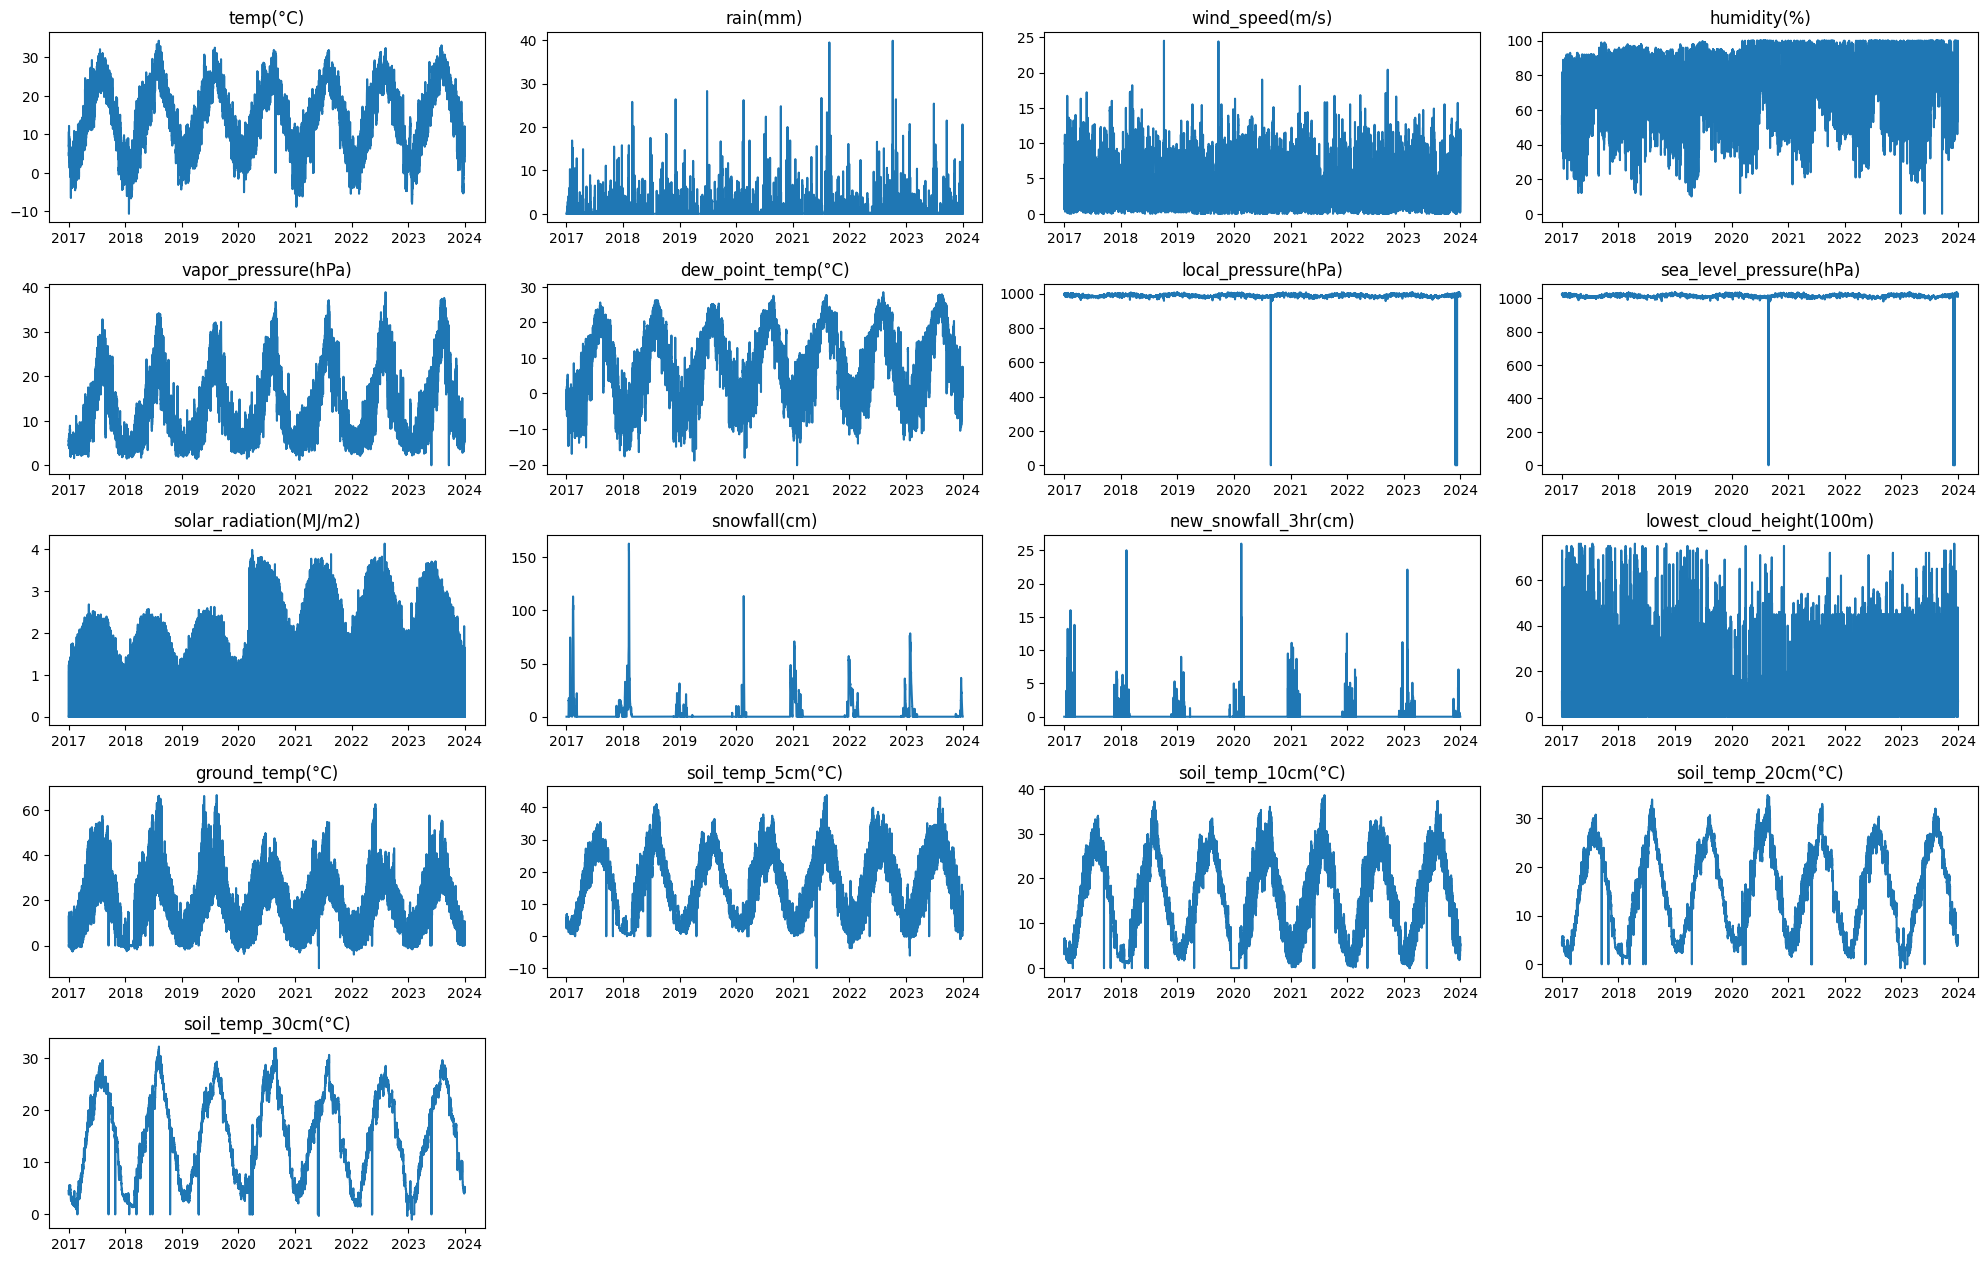

In [ ]:
location_df_without_location = location_as_df.drop([
    'location_name',
    'location',
    'datetime',
    'wind_direction(16pts)',
    'sunshine(hr)',
    'low_mid_cloud_cover(1/10)',
    'visibility(10m)',
    'total_cloud_cover(1/10)'
    ], axis=1)

n_rows = 6
n_cols = 4

plt.figure(figsize=(20, 15))


for i in range(location_df_without_location.shape[1]):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(location_df_without_location.iloc[:, i])
    plt.title(location_df_without_location.columns[i])

plt.tight_layout()
plt.show()

<Axes: >

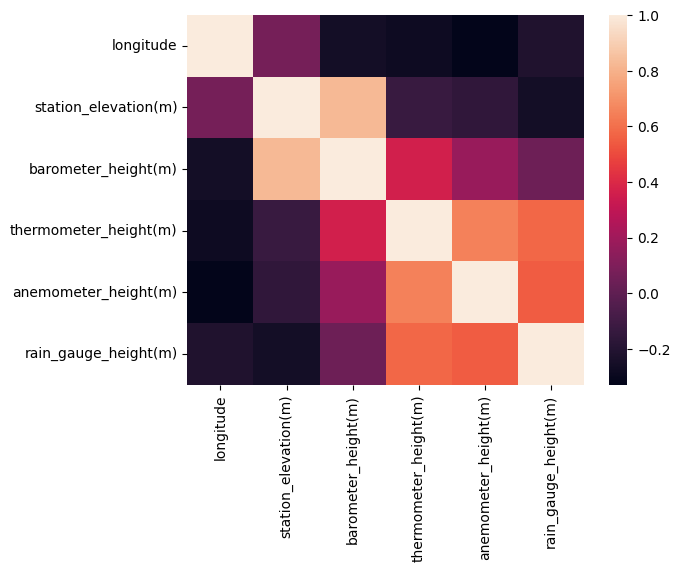

In [ ]:
correlation = location_df.iloc[:,2:].corr(numeric_only=True)
correlation.style.background_gradient(cmap = 'BrBG')
sns.heatmap(correlation)

# Weather_modeling


In [ ]:
train_end = pd.to_datetime('2020-12-31')
val_start = pd.to_datetime('2021-01-01')
val_end = pd.to_datetime('2022-12-31')


train_df = merged_df[merged_df['datetime'] <= train_end]
val_df = merged_df[(merged_df['datetime'] >= val_start) & (merged_df['datetime'] <= val_end)]

print(f'Train Set Shape: {train_df.shape}')
print(f'Validation Set Shape: {val_df.shape}')

Train Set Shape: (981074, 32)
Validation Set Shape: (489916, 32)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

numeric_columns = [
     'temp(°C)', 'rain(mm)',
     'wind_speed(m/s)', 'wind_direction(16pts)', 'humidity(%)',
     'vapor_pressure(hPa)', 'dew_point_temp(°C)', 'local_pressure(hPa)',
       'sea_level_pressure(hPa)', 'sunshine(hr)', 'solar_radiation(MJ/m2)',
       'snowfall(cm)', 'new_snowfall_3hr(cm)', 'total_cloud_cover(1/10)',
       'low_mid_cloud_cover(1/10)', 'lowest_cloud_height(100m)',
       'visibility(10m)', 'ground_temp(°C)', 'soil_temp_5cm(°C)',
       'soil_temp_10cm(°C)', 'soil_temp_20cm(°C)', 'soil_temp_30cm(°C)', 'latitude',
     'longitude', 'station_elevation(m)', 'barometer_height(m)',	'thermometer_height(m)',
      'anemometer_height(m)',	'rain_gauge_height(m)'
]

scaler = MinMaxScaler()
scaler.fit(train_df[numeric_columns])

train_scaled = scaler.transform(train_df[numeric_columns])
val_scaled = scaler.transform(val_df[numeric_columns])

sequence_length = 24

train_generator = TimeseriesGenerator(train_scaled, train_scaled,
                                      length=sequence_length, batch_size=1)

val_generator = TimeseriesGenerator(val_scaled, val_scaled,
                                    length=sequence_length, batch_size=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tcn import TCN

weather_TCN_model = Sequential([
    TCN(input_shape=(sequence_length, len(numeric_columns)),
        nb_filters=64,  # TCN의 필터 수
        kernel_size=2,  # 커널 크기
        dilations=[1, 2, 4, 8],  # 다양한 dilation 비율
        padding='causal',  # 'causal' 패딩 사용
        use_skip_connections=True,  # 스킵 연결 사용
        name='TCN_Layer'),
    Dropout(0.2, name='Dropout_1'),
    Dense(100, activation='tanh', name='Dense_1'),
    Dropout(0.2, name='Dropout_2'),
    Dense(len(numeric_columns), name='Output_Layer')
], name='Weather_TCN_Model')

cp_tcn = ModelCheckpoint('/content/drive/MyDrive/DB Economy Competition/weather_tcn/', save_best_only=True)

weather_TCN_model.compile(optimizer='adam', loss='mse')

weather_TCN_model.summary()

Model: "Weather_TCN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 TCN_Layer (TCN)             (None, 64)                63488     
                                                                 
 Dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 Dense_1 (Dense)             (None, 100)               6500      
                                                                 
 Dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 Output_Layer (Dense)        (None, 29)                2929      
                                                                 
Total params: 72917 (284.83 KB)
Trainable params: 72917 (284.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation

weather_LSTM_model = Sequential([
    LSTM(200, activation='tanh', recurrent_activation='sigmoid',
         input_shape=(sequence_length, len(numeric_columns)), return_sequences=True, name='lstm_layer'),
    Dropout(0.2, name='dropout_1'),
    Dense(100, activation='tanh', name='dense_1'),
    Dropout(0.2, name='dropout_2'),
    Dense(len(numeric_columns), name='output_layer')
], name='weather_LSTM_model')

cp_lstm = ModelCheckpoint('/content/drive/MyDrive/DB Economy Competition/weather_lstm/', save_best_only=True)

weather_LSTM_model.compile(optimizer='adam', loss='mse')
weather_LSTM_model.summary()

Model: "weather_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer (LSTM)           (None, 24, 200)           184000    
                                                                 
 dropout_1 (Dropout)         (None, 24, 200)           0         
                                                                 
 dense_1 (Dense)             (None, 24, 100)           20100     
                                                                 
 dropout_2 (Dropout)         (None, 24, 100)           0         
                                                                 
 output_layer (Dense)        (None, 24, 29)            2929      
                                                                 
Total params: 207029 (808.71 KB)
Trainable params: 207029 (808.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
TCN_history = weather_TCN_model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=3,
                    callbacks = [cp_tcn])

weather_TCN_model.save('/content/drive/MyDrive/DB Economy Competition/weather_model_TCN.h5')

Epoch 1/3
981050/981050 [==============================] - 9341s 10ms/step - loss: 0.0130 - val_loss: 0.0114
Epoch 2/3
981050/981050 [==============================] - 9316s 9ms/step - loss: 0.0127 - val_loss: 0.0111
Epoch 3/3
981048/981050 [============================>.] - ETA: 0s - loss: 0.0128

In [ ]:
LSTM_history = weather_LSTM_model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=3,
                    callbacks = [cp_lstm])

weather_LSTM_model.save('/content/drive/MyDrive/DB Economy Competition/weather_model_LSTM.h5')

Epoch 1/3
981050/981050 [==============================] - 8121s 8ms/step - loss: 0.0152 - val_loss: 0.0155
Epoch 2/3
981050/981050 [==============================] - 8147s 8ms/step - loss: 0.0148 - val_loss: 0.0158
Epoch 3/3
981048/981050 [============================>.] - ETA: 0s - loss: 0.0314

In [ ]:
!pip freeze > requirements.txt

# 의령 예측값

In [ ]:
euiryeong_df = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/2023년 의령.csv', encoding = 'cp949')

euiryeong_df['일시'] = pd.to_datetime(euiryeong_df['일시'])
euiryeong_df.drop([
    '기온 QC플래그',
    '강수량 QC플래그',
    '풍속 QC플래그',
    '풍향 QC플래그',
    '습도 QC플래그',
    '현지기압 QC플래그',
    '해면기압 QC플래그',
    '일조 QC플래그',
    '일사 QC플래그',
    '지면상태(지면상태코드)',
    '현상번호(국내식)',
    '운형(운형약어)',
    '지면온도 QC플래그'], axis = 1, inplace=True)

In [ ]:
euiryeong_df.rename(columns={
    '지점': 'location',
    '지점명': 'location_name',
    '일시': 'datetime',
    '기온(°C)': 'temp(°C)',
    '강수량(mm)': 'rain(mm)',
    '풍속(m/s)': 'wind_speed(m/s)',
    '풍향(16방위)': 'wind_direction(16pts)',
    '습도(%)': 'humidity(%)',
    '증기압(hPa)': 'vapor_pressure(hPa)',
    '이슬점온도(°C)': 'dew_point_temp(°C)',
    '현지기압(hPa)': 'local_pressure(hPa)',
    '해면기압(hPa)': 'sea_level_pressure(hPa)',
    '일조(hr)': 'sunshine(hr)',
    '일사(MJ/m2)': 'solar_radiation(MJ/m2)',
    '적설(cm)': 'snowfall(cm)',
    '3시간신적설(cm)': 'new_snowfall_3hr(cm)',
    '전운량(10분위)': 'total_cloud_cover(1/10)',
    '중하층운량(10분위)': 'low_mid_cloud_cover(1/10)',
    '최저운고(100m )': 'lowest_cloud_height(100m)',
    '시정(10m)': 'visibility(10m)',
    '지면온도(°C)': 'ground_temp(°C)',
    '5cm 지중온도(°C)': 'soil_temp_5cm(°C)',
    '10cm 지중온도(°C)': 'soil_temp_10cm(°C)',
    '20cm 지중온도(°C)': 'soil_temp_20cm(°C)',
    '30cm 지중온도(°C)': 'soil_temp_30cm(°C)'
                  }, inplace = True)

euiryeong_df.fillna(0, inplace=True)
euiryeong_df

,location,location_name,datetime,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),...,new_snowfall_3hr(cm),total_cloud_cover(1/10),low_mid_cloud_cover(1/10),lowest_cloud_height(100m),visibility(10m),ground_temp(°C),soil_temp_5cm(°C),soil_temp_10cm(°C),soil_temp_20cm(°C),soil_temp_30cm(°C)
0,263,의령군,2023-01-01 01:00:00,-6.3,0.0,0.9,70.0,88.0,3.4,-7.9,...,0.0,0.0,0.0,0.0,948.0,-2.3,-0.2,1.9,3.0,4.0
1,263,의령군,2023-01-01 02:00:00,-6.3,0.0,0.7,110.0,89.0,3.4,-7.8,...,0.0,0.0,0.0,0.0,1137.0,-2.5,-0.2,1.8,3.1,4.1
2,263,의령군,2023-01-01 03:00:00,-6.9,0.0,0.5,230.0,90.0,3.3,-8.2,...,0.0,0.0,0.0,0.0,858.0,-2.7,-0.3,1.8,3.0,4.0
3,263,의령군,2023-01-01 04:00:00,-7.3,0.0,0.6,20.0,89.0,3.1,-8.8,...,0.0,0.0,0.0,0.0,904.0,-2.9,-0.4,1.8,3.0,4.0
4,263,의령군,2023-01-01 05:00:00,-7.4,0.0,0.3,0.0,90.0,3.2,-8.7,...,0.0,0.0,0.0,0.0,909.0,-3.2,-0.5,1.7,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,263,의령군,2023-12-31 19:00:00,5.6,0.0,1.7,340.0,71.0,6.4,0.7,...,0.0,7.0,5.0,4.0,4031.0,3.5,6.1,7.5,7.0,7.2
8755,263,의령군,2023-12-31 20:00:00,5.2,0.0,0.7,70.0,76.0,6.7,1.3,...,0.0,7.0,7.0,4.0,3367.0,4.0,5.9,7.4,7.1,7.2
8756,263,의령군,2023-12-31 21:00:00,4.5,0.0,1.3,340.0,81.0,6.8,1.5,...,0.0,6.0,6.0,4.0,3004.0,3.9,5.8,7.3,7.1,7.3
8757,263,의령군,2023-12-31 22:00:00,2.8,0.0,0.3,0.0,85.0,6.3,0.5,...,0.0,8.0,0.0,0.0,2684.0,1.3,5.1,7.2,7.0,7.3


In [ ]:
from tensorflow.keras.models import load_model
from keras.utils import custom_object_scope
from tcn import TCN

tcn_model_path = '/content/drive/MyDrive/DB Economy Competition/weather_model_TCN.h5'

with custom_object_scope({'TCN': TCN}):
    tcn_loaded_model = load_model(tcn_model_path)

lstm_model_path = '/content/drive/MyDrive/DB Economy Competition/weather_model_LSTM.h5'
lstm_loaded_model = load_model(lstm_model_path)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

numeric_columns = [
     'temp(°C)', 'rain(mm)',
     'wind_speed(m/s)', 'wind_direction(16pts)', 'humidity(%)',
     'vapor_pressure(hPa)', 'dew_point_temp(°C)', 'local_pressure(hPa)',
       'sea_level_pressure(hPa)', 'sunshine(hr)', 'solar_radiation(MJ/m2)',
       'snowfall(cm)', 'new_snowfall_3hr(cm)', 'total_cloud_cover(1/10)',
       'low_mid_cloud_cover(1/10)', 'lowest_cloud_height(100m)',
       'visibility(10m)', 'ground_temp(°C)', 'soil_temp_5cm(°C)',
       'soil_temp_10cm(°C)', 'soil_temp_20cm(°C)', 'soil_temp_30cm(°C)', 'latitude',
     'longitude', 'station_elevation(m)', 'barometer_height(m)',	'thermometer_height(m)',
      'anemometer_height(m)',	'rain_gauge_height(m)'
]

In [ ]:
location_df = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/관측데이터.csv')

location_df = location_df.drop(['시작일', '종료일', '관리관서', '지점주소', '지점'], axis = 1)

location_df = location_df.iloc[:, :-2]
location_df.fillna(0, inplace=True)

location_df.rename(columns = {
    '위도': 'latitude',
    '경도': 'longitude',
    '지점명': 'location_name',
    '노장해발고도(m)': 'station_elevation(m)',
    '기압계(관측장비지상높이(m))': 'barometer_height(m)',
    '기온계(관측장비지상높이(m))': 'thermometer_height(m)',
    '풍속계(관측장비지상높이(m))': 'anemometer_height(m)',
    '강우계(관측장비지상높이(m))': 'rain_gauge_height(m)'
}, inplace = True)

location_df['location_name'] = location_df['location_name'].replace('울릉도독도(감)', '울릉도')
location_df.head()

,location_name,latitude,longitude,station_elevation(m),barometer_height(m),thermometer_height(m),anemometer_height(m),rain_gauge_height(m)
0,울릉도,37.4800,130.9000,220.90,0.00,0.00,0.0,0.0
1,울진,36.9918,129.4128,48.98,50.18,1.75,10.0,1.3
2,안동,36.5729,128.7073,141.26,0.00,0.00,10.0,0.0
3,상주,36.4084,128.1574,96.58,97.98,1.80,10.0,1.4
4,포항,36.0320,129.3800,3.94,4.92,1.60,10.0,1.2


In [ ]:
merged_euiryeong = pd.merge(euiryeong_df, location_df, left_on='location_name', right_on='location_name')
merged_euiryeong

,location,location_name,datetime,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),...,soil_temp_10cm(°C),soil_temp_20cm(°C),soil_temp_30cm(°C),latitude,longitude,station_elevation(m),barometer_height(m),thermometer_height(m),anemometer_height(m),rain_gauge_height(m)
0,263,의령군,2023-01-01 01:00:00,-6.3,0.0,0.9,70.0,88.0,3.4,-7.9,...,1.9,3.0,4.0,35.3226,128.2881,14.1,14.9,2.0,10.0,0.6
1,263,의령군,2023-01-01 02:00:00,-6.3,0.0,0.7,110.0,89.0,3.4,-7.8,...,1.8,3.1,4.1,35.3226,128.2881,14.1,14.9,2.0,10.0,0.6
2,263,의령군,2023-01-01 03:00:00,-6.9,0.0,0.5,230.0,90.0,3.3,-8.2,...,1.8,3.0,4.0,35.3226,128.2881,14.1,14.9,2.0,10.0,0.6
3,263,의령군,2023-01-01 04:00:00,-7.3,0.0,0.6,20.0,89.0,3.1,-8.8,...,1.8,3.0,4.0,35.3226,128.2881,14.1,14.9,2.0,10.0,0.6
4,263,의령군,2023-01-01 05:00:00,-7.4,0.0,0.3,0.0,90.0,3.2,-8.7,...,1.7,3.0,4.0,35.3226,128.2881,14.1,14.9,2.0,10.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,263,의령군,2023-12-31 19:00:00,5.6,0.0,1.7,340.0,71.0,6.4,0.7,...,7.5,7.0,7.2,35.3226,128.2881,14.1,14.9,2.0,10.0,0.6
8755,263,의령군,2023-12-31 20:00:00,5.2,0.0,0.7,70.0,76.0,6.7,1.3,...,7.4,7.1,7.2,35.3226,128.2881,14.1,14.9,2.0,10.0,0.6
8756,263,의령군,2023-12-31 21:00:00,4.5,0.0,1.3,340.0,81.0,6.8,1.5,...,7.3,7.1,7.3,35.3226,128.2881,14.1,14.9,2.0,10.0,0.6
8757,263,의령군,2023-12-31 22:00:00,2.8,0.0,0.3,0.0,85.0,6.3,0.5,...,7.2,7.0,7.3,35.3226,128.2881,14.1,14.9,2.0,10.0,0.6


In [ ]:
scaler = MinMaxScaler()
scaler.fit(merged_euiryeong[numeric_columns])

euiryeong_scaled = scaler.transform(merged_euiryeong[numeric_columns])

sequence_length = 24

euiryeong_generator = TimeseriesGenerator(euiryeong_scaled, euiryeong_scaled,
                                          length=sequence_length, batch_size=1)

euiryeong_tcn_predictions = tcn_loaded_model.predict(euiryeong_generator)
euiryeong_tcn_predictions = scaler.inverse_transform(euiryeong_tcn_predictions)

8735/8735 [==============================] - 26s 3ms/step


In [ ]:
lstm_predictions = lstm_loaded_model.predict(euiryeong_generator)
lstm_predictions_last_step = lstm_predictions[:, -1, :]
euiryeong_lstm_predictions = scaler.inverse_transform(lstm_predictions_last_step)

print(euiryeong_tcn_predictions)
print(euiryeong_lstm_predictions)

8735/8735 [==============================] - 30s 3ms/step
[[ 4.947842    0.56150794 -0.04584096 ...  2.0599144   9.982308
   0.6606609 ]
 [ 6.1042404   0.98348325  0.05332109 ...  2.0549722   9.970239
   0.6455844 ]
 [ 5.742615    0.6929103   0.18813139 ...  2.0470595   9.966056
   0.6602438 ]
 ...
 [ 8.670474    0.6149178   0.22836028 ...  2.0352252   9.991802
   0.64763844]
 [ 8.402362    0.51004946  0.21041152 ...  2.0564551  10.022174
   0.6715128 ]
 [ 5.4991546   0.16406935  0.11352759 ...  2.0497832  10.0043
   0.64152426]]
[[9.3880577e+00 4.1202796e-03 7.0808125e-01 ... 2.7142901e+00
  1.0492559e+01 1.1169873e+00]
 [1.0039946e+01 3.4569118e-02 7.8414339e-01 ... 2.5113606e+00
  1.0426855e+01 1.0564364e+00]
 [8.7602844e+00 8.5909113e-02 7.2510093e-01 ... 2.1344552e+00
  1.0273682e+01 6.7651027e-01]
 ...
 [1.0676345e+01 2.3038894e-02 7.8620511e-01 ... 2.8268607e+00
  1.0567501e+01 1.2708390e+00]
 [1.2052413e+01 1.8860124e-02 9.3800920e-01 ... 2.7983510e+00
  1.0534418e+01 1.2486384

In [ ]:
print("Original LSTM predictions shape:", lstm_predictions.shape)

lstm_predictions_last_step = lstm_predictions[:, -1, 0]  # Adjust the last index based on your data

print("Reshaped LSTM predictions shape:", lstm_predictions_last_step.shape)

lstm_predictions_last_step_all_features = lstm_predictions[:, -1, :]

euiryeong_lstm_predictions = scaler.inverse_transform(lstm_predictions_last_step_all_features)

print("Inverse transformed predictions shape:", euiryeong_lstm_predictions.shape)

Original LSTM predictions shape: (8735, 24, 29)
Reshaped LSTM predictions shape: (8735,)
Inverse transformed predictions shape: (8735, 29)


In [ ]:
euiryeong_tcn_predictions.shape
euiryeong_lstm_predictions.shape

(8735, 29)

In [ ]:
type(euiryeong_tcn_predictions)

numpy.ndarray

In [ ]:
predictions_tcn_df = pd.DataFrame(euiryeong_tcn_predictions, columns=numeric_columns)
predictions_lstm_df = pd.DataFrame(euiryeong_lstm_predictions, columns=numeric_columns)

datetime_index = merged_euiryeong['datetime'][sequence_length:].reset_index(drop=True)

predictions_tcn_df['datetime'] = datetime_index
predictions_lstm_df['datetime'] = datetime_index

non_numeric_columns = ['location', 'location_name']
non_numeric_df = merged_euiryeong[non_numeric_columns][sequence_length:].reset_index(drop=True)

final_predictions_tcn_df = pd.concat([non_numeric_df, predictions_tcn_df], axis=1)
final_predictions_lstm_df = pd.concat([non_numeric_df, predictions_lstm_df], axis=1)


final_predictions_tcn_df
final_predictions_lstm_df

,location,location_name,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),local_pressure(hPa),...,soil_temp_20cm(°C),soil_temp_30cm(°C),latitude,longitude,station_elevation(m),barometer_height(m),thermometer_height(m),anemometer_height(m),rain_gauge_height(m),datetime
0,263,의령군,9.388058,0.004120,0.708081,163.083160,65.848190,6.489473,0.356367,1021.032776,...,4.374634,14.710980,35.581318,128.541519,14.215394,15.007264,2.714290,10.492559,1.116987,2023-01-02 01:00:00
1,263,의령군,10.039946,0.034569,0.784143,141.421051,67.849335,7.259603,1.293988,1016.300781,...,2.381042,13.509696,35.620491,128.601715,14.202405,14.885738,2.511361,10.426855,1.056436,2023-01-02 02:00:00
2,263,의령군,8.760284,0.085909,0.725101,145.538315,62.159115,5.061083,-0.475889,1006.313965,...,9.623355,17.321447,35.832176,128.764542,14.437156,14.885458,2.134455,10.273682,0.676510,2023-01-02 03:00:00
3,263,의령군,8.079208,0.056936,0.747949,168.379379,66.787643,5.490549,-0.651199,1016.167297,...,3.634130,14.425255,35.746944,128.577438,14.370008,15.104579,2.661362,10.492558,1.089837,2023-01-02 04:00:00
4,263,의령군,10.083366,0.006024,0.764388,153.565414,66.689880,7.095489,1.811849,1005.827698,...,7.793598,16.069128,35.623844,128.576889,14.354009,15.030318,2.509243,10.432752,0.902922,2023-01-02 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,263,의령군,12.547963,0.003142,0.863404,168.121338,67.389503,9.194563,3.647845,1015.934875,...,3.162181,13.769885,35.478981,128.504608,14.151215,14.979058,2.807976,10.553638,1.230382,2023-12-31 19:00:00
8731,263,의령군,8.682048,0.004077,0.689632,168.284027,67.830521,6.348563,0.248093,1018.892395,...,4.517003,14.865466,35.608654,128.519135,14.314878,15.110620,2.756418,10.531116,1.124704,2023-12-31 20:00:00
8732,263,의령군,10.676345,0.023039,0.786205,167.686646,60.031395,6.033299,-0.173367,996.017029,...,3.906252,13.574638,35.641830,128.510742,14.308806,15.133214,2.826861,10.567501,1.270839,2023-12-31 21:00:00
8733,263,의령군,12.052413,0.018860,0.938009,166.229843,63.889164,8.003186,2.291066,1015.434631,...,2.205831,13.225913,35.552868,128.537491,14.157986,14.985812,2.798351,10.534418,1.248638,2023-12-31 22:00:00


In [ ]:
final_predictions_tcn_df.to_csv('final_predictions_tcn.csv', index=False)

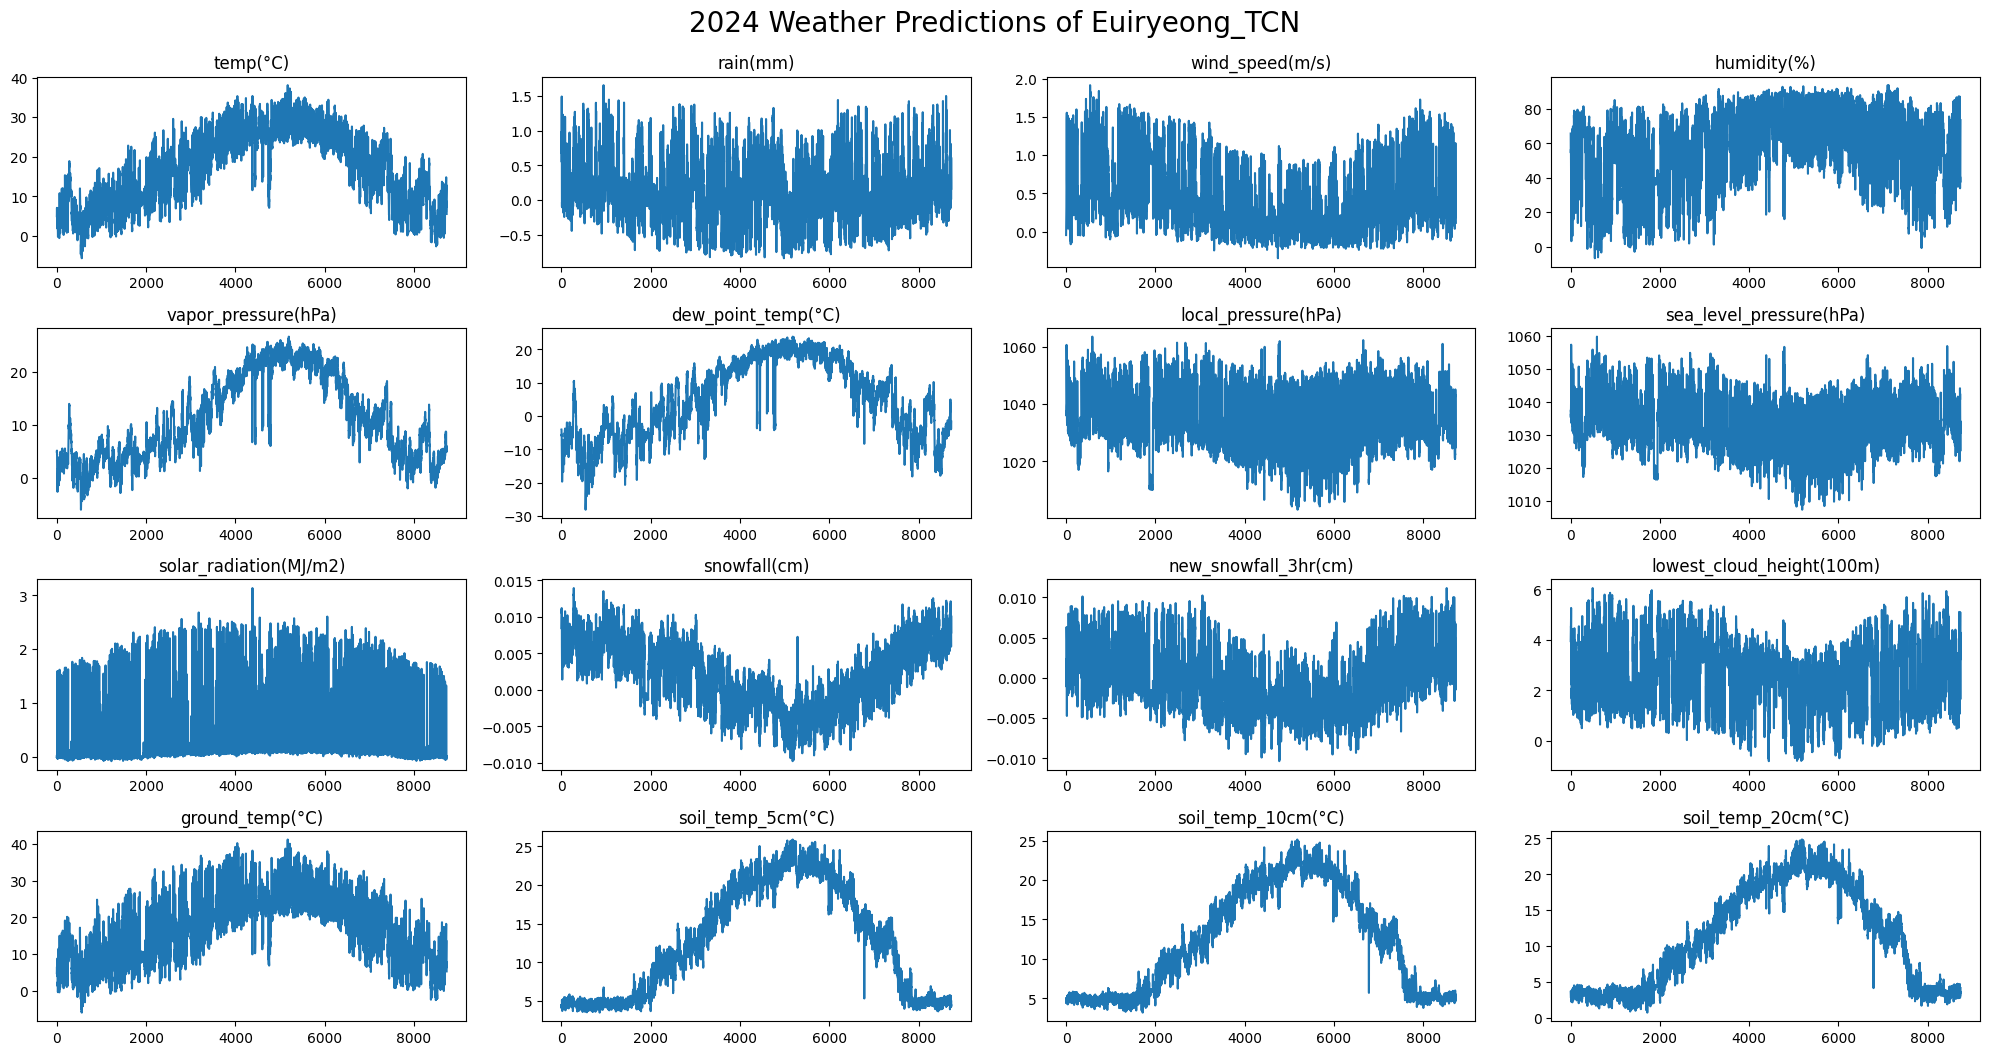

In [ ]:
final_tcn_df_without_location = final_predictions_tcn_df.drop([
    'location_name',
    'location',
    'datetime',
    'wind_direction(16pts)',
    'sunshine(hr)',
    'low_mid_cloud_cover(1/10)',
    'visibility(10m)',
    'total_cloud_cover(1/10)',
    'soil_temp_30cm(°C)',
    'latitude',
    'longitude',
    'station_elevation(m)',
    'barometer_height(m)',
    'thermometer_height(m)',
    'anemometer_height(m)',
    'rain_gauge_height(m)'
    ], axis=1)

n_rows = 6
n_cols = 4

plt.figure(figsize=(20, 15))

for i in range(final_tcn_df_without_location.shape[1]):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(final_tcn_df_without_location.iloc[:, i])
    plt.title(final_tcn_df_without_location.columns[i])

plt.tight_layout()
plt.suptitle("2024 Weather Predictions of Euiryeong_TCN", fontsize=20, y=1.02)
plt.show()

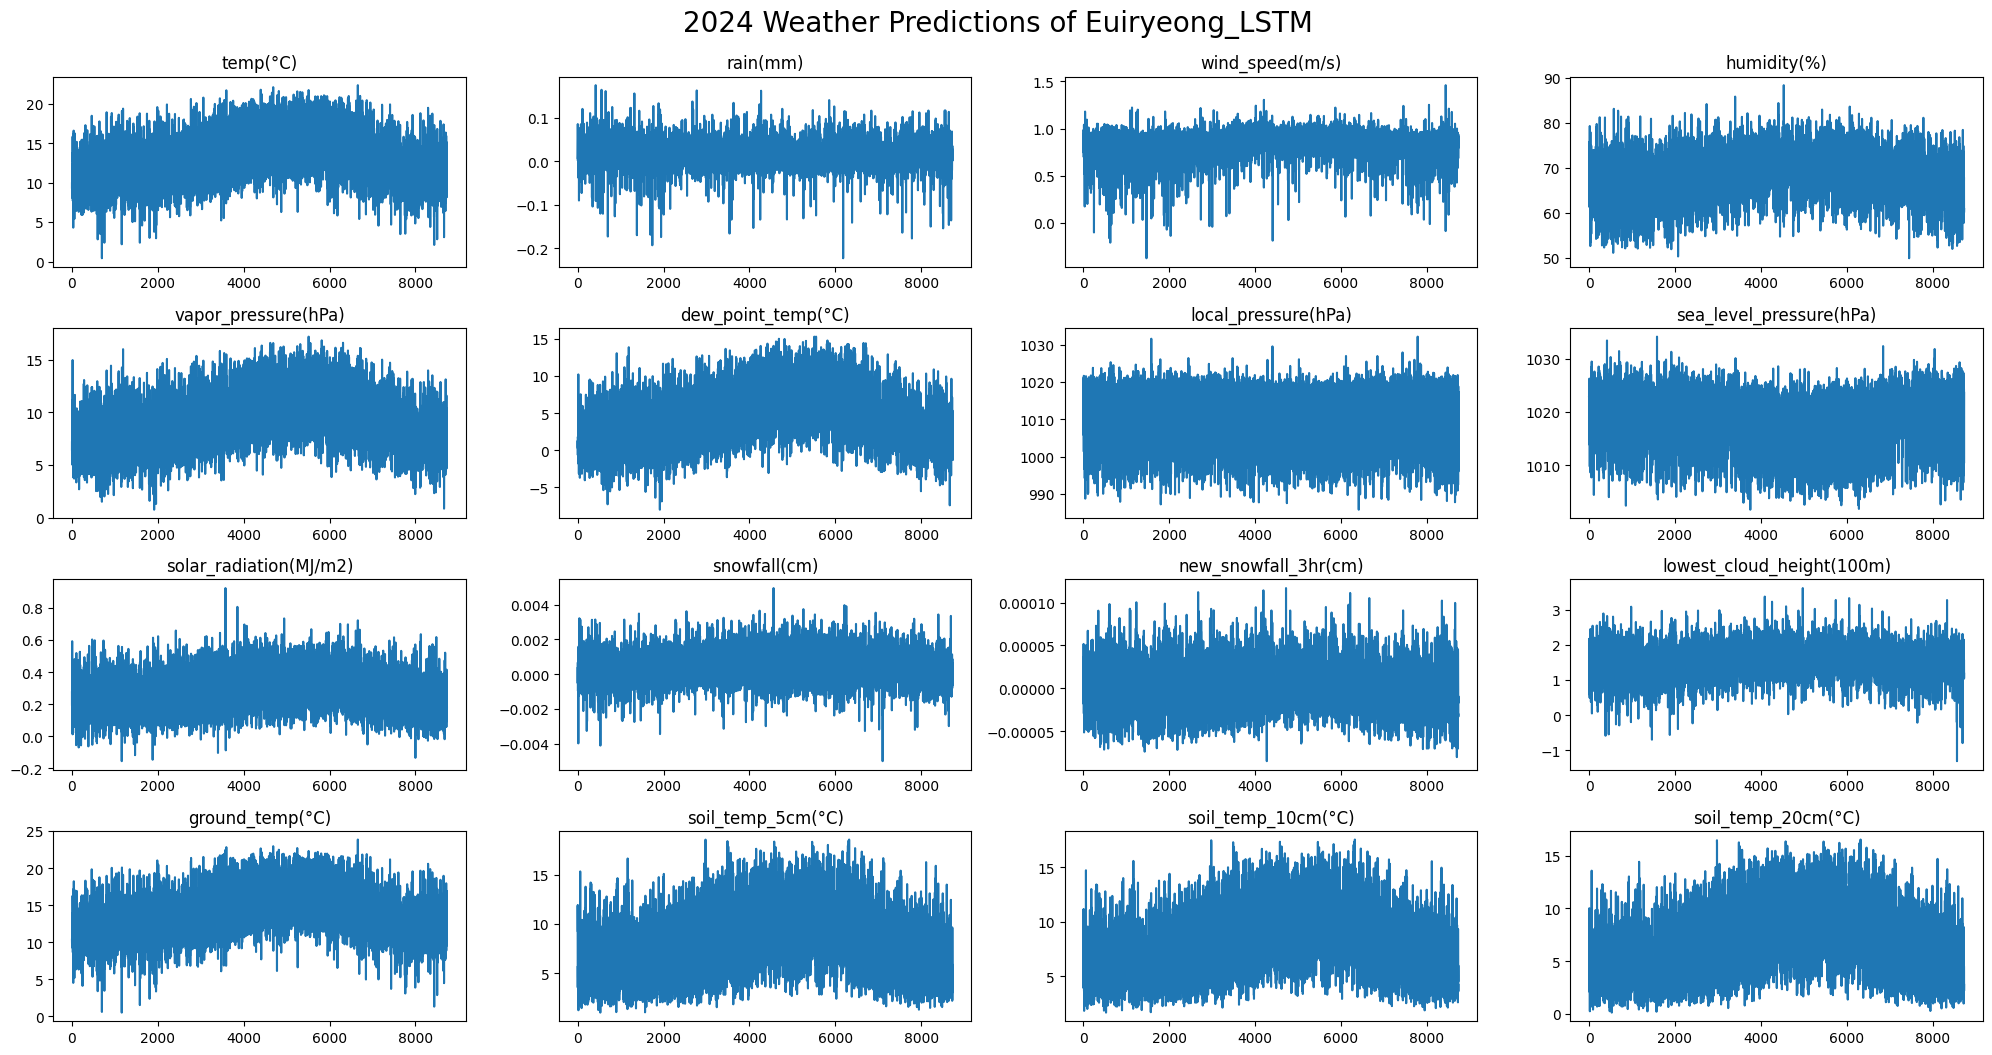

In [ ]:
final_lstm_df_without_location = final_predictions_lstm_df.drop([
    'location_name',
    'location',
    'datetime',
    'wind_direction(16pts)',
    'sunshine(hr)',
    'low_mid_cloud_cover(1/10)',
    'visibility(10m)',
    'total_cloud_cover(1/10)',
    'soil_temp_30cm(°C)',
    'latitude',
    'longitude',
    'station_elevation(m)',
    'barometer_height(m)',
    'thermometer_height(m)',
    'anemometer_height(m)',
    'rain_gauge_height(m)'
    ], axis=1)

n_rows = 6
n_cols = 4

plt.figure(figsize=(20, 15))

for i in range(final_lstm_df_without_location.shape[1]):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(final_lstm_df_without_location.iloc[:, i])
    plt.title(final_lstm_df_without_location.columns[i])

plt.tight_layout()
plt.suptitle("2024 Weather Predictions of Euiryeong_LSTM", fontsize=20, y=1.02)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_data = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/의령 실제값.csv', encoding = 'cp949')
actual_data['일시'] = pd.to_datetime(actual_data['일시'])

actual_data.drop([
    '기온 QC플래그',
    '강수량 QC플래그',
    '풍속 QC플래그',
    '풍향 QC플래그',
    '습도 QC플래그',
    '현지기압 QC플래그',
    '해면기압 QC플래그',
    '일조 QC플래그',
    '일사 QC플래그',
    '지면상태(지면상태코드)',
    '현상번호(국내식)',
    '운형(운형약어)',
    '지면온도 QC플래그'], axis = 1, inplace=True)

actual_data.columns

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
       '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [ ]:
actual_data.rename(columns={
    '지점': 'location',
    '지점명': 'location_name',
    '일시': 'datetime',
    '기온(°C)': 'temp(°C)',
    '강수량(mm)': 'rain(mm)',
    '풍속(m/s)': 'wind_speed(m/s)',
    '풍향(16방위)': 'wind_direction(16pts)',
    '습도(%)': 'humidity(%)',
    '증기압(hPa)': 'vapor_pressure(hPa)',
    '이슬점온도(°C)': 'dew_point_temp(°C)',
    '현지기압(hPa)': 'local_pressure(hPa)',
    '해면기압(hPa)': 'sea_level_pressure(hPa)',
    '일조(hr)': 'sunshine(hr)',
    '일사(MJ/m2)': 'solar_radiation(MJ/m2)',
    '적설(cm)': 'snowfall(cm)',
    '3시간신적설(cm)': 'new_snowfall_3hr(cm)',
    '전운량(10분위)': 'total_cloud_cover(1/10)',
    '중하층운량(10분위)': 'low_mid_cloud_cover(1/10)',
    '최저운고(100m )': 'lowest_cloud_height(100m)',
    '시정(10m)': 'visibility(10m)',
    '지면온도(°C)': 'ground_temp(°C)',
    '5cm 지중온도(°C)': 'soil_temp_5cm(°C)',
    '10cm 지중온도(°C)': 'soil_temp_10cm(°C)',
    '20cm 지중온도(°C)': 'soil_temp_20cm(°C)',
    '30cm 지중온도(°C)': 'soil_temp_30cm(°C)'
                  }, inplace = True)

actual_data.fillna(0, inplace=True)

actual_values = actual_data['temp(°C)'].values

tcn_predictions = final_predictions_tcn_df['temp(°C)'].values[:744]
lstm_predictions = final_predictions_lstm_df['temp(°C)'].values[:744]

mse_tcn = mean_squared_error(actual_values, tcn_predictions)
rmse_tcn = np.sqrt(mse_tcn)
mse_lstm = mean_squared_error(actual_values, lstm_predictions)
rmse_lstm = np.sqrt(mse_lstm)

def calculate_accuracy_within_threshold(actual, predicted, threshold=0.05):
    absolute_difference = np.abs(actual - predicted)
    error_percentage = absolute_difference / np.maximum(np.abs(actual), 1e-7)
    accuracy_within_threshold = np.mean(error_percentage <= threshold)
    return accuracy_within_threshold

accuracy_tcn = calculate_accuracy_within_threshold(actual_values, tcn_predictions)
accuracy_lstm = calculate_accuracy_within_threshold(actual_values, lstm_predictions)

print(f"TCN - MSE: {mse_tcn}, RMSE: {rmse_tcn}, Accuracy within threshold: {accuracy_tcn}")
print(f"LSTM - MSE: {mse_lstm}, RMSE: {rmse_lstm}, Accuracy within threshold: {accuracy_lstm}")


TCN - MSE: 42.92777595947006, RMSE: 6.551929178453477, Accuracy within threshold: 0.024193548387096774
LSTM - MSE: 111.94516823724271, RMSE: 10.580414369827048, Accuracy within threshold: 0.020161290322580645


# 영주 예측값

In [ ]:
youngju_df = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/2023년 영주.csv', encoding = 'cp949')

youngju_df['일시'] = pd.to_datetime(youngju_df['일시'])
youngju_df.drop([
    '기온 QC플래그',
    '강수량 QC플래그',
    '풍속 QC플래그',
    '풍향 QC플래그',
    '습도 QC플래그',
    '현지기압 QC플래그',
    '해면기압 QC플래그',
    '일조 QC플래그',
    '일사 QC플래그',
    '지면상태(지면상태코드)',
    '현상번호(국내식)',
    '운형(운형약어)',
    '지면온도 QC플래그'], axis = 1, inplace=True)

In [ ]:
youngju_df.rename(columns={
    '지점': 'location',
    '지점명': 'location_name',
    '일시': 'datetime',
    '기온(°C)': 'temp(°C)',
    '강수량(mm)': 'rain(mm)',
    '풍속(m/s)': 'wind_speed(m/s)',
    '풍향(16방위)': 'wind_direction(16pts)',
    '습도(%)': 'humidity(%)',
    '증기압(hPa)': 'vapor_pressure(hPa)',
    '이슬점온도(°C)': 'dew_point_temp(°C)',
    '현지기압(hPa)': 'local_pressure(hPa)',
    '해면기압(hPa)': 'sea_level_pressure(hPa)',
    '일조(hr)': 'sunshine(hr)',
    '일사(MJ/m2)': 'solar_radiation(MJ/m2)',
    '적설(cm)': 'snowfall(cm)',
    '3시간신적설(cm)': 'new_snowfall_3hr(cm)',
    '전운량(10분위)': 'total_cloud_cover(1/10)',
    '중하층운량(10분위)': 'low_mid_cloud_cover(1/10)',
    '최저운고(100m )': 'lowest_cloud_height(100m)',
    '시정(10m)': 'visibility(10m)',
    '지면온도(°C)': 'ground_temp(°C)',
    '5cm 지중온도(°C)': 'soil_temp_5cm(°C)',
    '10cm 지중온도(°C)': 'soil_temp_10cm(°C)',
    '20cm 지중온도(°C)': 'soil_temp_20cm(°C)',
    '30cm 지중온도(°C)': 'soil_temp_30cm(°C)'
                  }, inplace = True)

youngju_df.fillna(0, inplace=True)
youngju_df

,location,location_name,datetime,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),...,new_snowfall_3hr(cm),total_cloud_cover(1/10),low_mid_cloud_cover(1/10),lowest_cloud_height(100m),visibility(10m),ground_temp(°C),soil_temp_5cm(°C),soil_temp_10cm(°C),soil_temp_20cm(°C),soil_temp_30cm(°C)
0,272,영주,2023-01-01 00:00:00,0.3,0.0,2.2,290.0,61.0,3.8,-6.3,...,0.0,0.0,0.0,0.0,1334.0,-3.0,0.0,0.0,0.0,0.0
1,272,영주,2023-01-01 01:00:00,0.4,0.0,2.7,320.0,60.0,3.8,-6.4,...,0.0,8.0,3.0,13.0,1324.0,-2.8,0.0,0.0,0.0,0.0
2,272,영주,2023-01-01 02:00:00,0.8,0.0,3.9,290.0,59.0,3.8,-6.3,...,0.0,0.0,0.0,0.0,1161.0,-2.3,0.0,0.0,0.0,0.0
3,272,영주,2023-01-01 03:00:00,0.7,0.0,5.0,320.0,61.0,3.9,-5.9,...,0.0,0.0,0.0,0.0,1027.0,-2.4,0.0,0.0,0.0,0.0
4,272,영주,2023-01-01 04:00:00,1.0,0.0,5.7,320.0,60.0,3.9,-5.9,...,0.0,3.0,3.0,13.0,867.0,-2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,272,영주,2023-12-31 19:00:00,2.7,0.0,2.2,290.0,89.0,6.6,1.0,...,0.0,0.0,0.0,0.0,2032.0,0.4,0.0,0.0,0.0,0.0
8756,272,영주,2023-12-31 20:00:00,2.7,0.0,1.7,250.0,88.0,6.5,0.9,...,0.0,0.0,0.0,0.0,2154.0,0.3,0.0,0.0,0.0,0.0
8757,272,영주,2023-12-31 21:00:00,1.4,0.0,2.6,320.0,92.0,6.2,0.2,...,0.0,6.0,6.0,12.0,1761.0,0.3,0.0,0.0,0.0,0.0
8758,272,영주,2023-12-31 22:00:00,2.0,0.0,1.9,290.0,90.0,6.3,0.5,...,0.0,0.0,0.0,0.0,2117.0,0.3,0.0,0.0,0.0,0.0


In [ ]:
from tensorflow.keras.models import load_model
from keras.utils import custom_object_scope
from tcn import TCN

tcn_model_path = '/content/drive/MyDrive/DB Economy Competition/weather_model_TCN.h5'

with custom_object_scope({'TCN': TCN}):
    tcn_loaded_model = load_model(tcn_model_path)

lstm_model_path = '/content/drive/MyDrive/DB Economy Competition/weather_model_LSTM.h5'
lstm_loaded_model = load_model(lstm_model_path)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

numeric_columns = [
     'temp(°C)', 'rain(mm)',
     'wind_speed(m/s)', 'wind_direction(16pts)', 'humidity(%)',
     'vapor_pressure(hPa)', 'dew_point_temp(°C)', 'local_pressure(hPa)',
       'sea_level_pressure(hPa)', 'sunshine(hr)', 'solar_radiation(MJ/m2)',
       'snowfall(cm)', 'new_snowfall_3hr(cm)', 'total_cloud_cover(1/10)',
       'low_mid_cloud_cover(1/10)', 'lowest_cloud_height(100m)',
       'visibility(10m)', 'ground_temp(°C)', 'soil_temp_5cm(°C)',
       'soil_temp_10cm(°C)', 'soil_temp_20cm(°C)', 'soil_temp_30cm(°C)', 'latitude',
     'longitude', 'station_elevation(m)', 'barometer_height(m)',	'thermometer_height(m)',
      'anemometer_height(m)',	'rain_gauge_height(m)'
]

In [ ]:
location_df = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/관측데이터.csv')

location_df = location_df.drop(['시작일', '종료일', '관리관서', '지점주소', '지점'], axis = 1)

location_df = location_df.iloc[:, :-2]
location_df.fillna(0, inplace=True)

location_df.rename(columns = {
    '위도': 'latitude',
    '경도': 'longitude',
    '지점명': 'location_name',
    '노장해발고도(m)': 'station_elevation(m)',
    '기압계(관측장비지상높이(m))': 'barometer_height(m)',
    '기온계(관측장비지상높이(m))': 'thermometer_height(m)',
    '풍속계(관측장비지상높이(m))': 'anemometer_height(m)',
    '강우계(관측장비지상높이(m))': 'rain_gauge_height(m)'
}, inplace = True)

location_df['location_name'] = location_df['location_name'].replace('울릉도독도(감)', '울릉도')
location_df.head()

,location_name,latitude,longitude,station_elevation(m),barometer_height(m),thermometer_height(m),anemometer_height(m),rain_gauge_height(m)
0,울릉도,37.4800,130.9000,220.90,0.00,0.00,0.0,0.0
1,울진,36.9918,129.4128,48.98,50.18,1.75,10.0,1.3
2,안동,36.5729,128.7073,141.26,0.00,0.00,10.0,0.0
3,상주,36.4084,128.1574,96.58,97.98,1.80,10.0,1.4
4,포항,36.0320,129.3800,3.94,4.92,1.60,10.0,1.2


In [ ]:
merged_youngju = pd.merge(youngju_df, location_df, left_on='location_name', right_on='location_name')
merged_youngju

,location,location_name,datetime,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),...,soil_temp_10cm(°C),soil_temp_20cm(°C),soil_temp_30cm(°C),latitude,longitude,station_elevation(m),barometer_height(m),thermometer_height(m),anemometer_height(m),rain_gauge_height(m)
0,272,영주,2023-01-01 00:00:00,0.3,0.0,2.2,290.0,61.0,3.8,-6.3,...,0.0,0.0,0.0,36.8718,128.5169,211.32,212.78,1.91,10.0,0.58
1,272,영주,2023-01-01 01:00:00,0.4,0.0,2.7,320.0,60.0,3.8,-6.4,...,0.0,0.0,0.0,36.8718,128.5169,211.32,212.78,1.91,10.0,0.58
2,272,영주,2023-01-01 02:00:00,0.8,0.0,3.9,290.0,59.0,3.8,-6.3,...,0.0,0.0,0.0,36.8718,128.5169,211.32,212.78,1.91,10.0,0.58
3,272,영주,2023-01-01 03:00:00,0.7,0.0,5.0,320.0,61.0,3.9,-5.9,...,0.0,0.0,0.0,36.8718,128.5169,211.32,212.78,1.91,10.0,0.58
4,272,영주,2023-01-01 04:00:00,1.0,0.0,5.7,320.0,60.0,3.9,-5.9,...,0.0,0.0,0.0,36.8718,128.5169,211.32,212.78,1.91,10.0,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,272,영주,2023-12-31 19:00:00,2.7,0.0,2.2,290.0,89.0,6.6,1.0,...,0.0,0.0,0.0,36.8718,128.5169,211.32,212.78,1.91,10.0,0.58
8756,272,영주,2023-12-31 20:00:00,2.7,0.0,1.7,250.0,88.0,6.5,0.9,...,0.0,0.0,0.0,36.8718,128.5169,211.32,212.78,1.91,10.0,0.58
8757,272,영주,2023-12-31 21:00:00,1.4,0.0,2.6,320.0,92.0,6.2,0.2,...,0.0,0.0,0.0,36.8718,128.5169,211.32,212.78,1.91,10.0,0.58
8758,272,영주,2023-12-31 22:00:00,2.0,0.0,1.9,290.0,90.0,6.3,0.5,...,0.0,0.0,0.0,36.8718,128.5169,211.32,212.78,1.91,10.0,0.58


In [ ]:
scaler = MinMaxScaler()
scaler.fit(merged_youngju[numeric_columns])

youngju_scaled = scaler.transform(merged_youngju[numeric_columns])

sequence_length = 24

youngju_generator = TimeseriesGenerator(youngju_scaled, youngju_scaled,
                                          length=sequence_length, batch_size=1)

youngju_tcn_predictions = tcn_loaded_model.predict(youngju_generator)
youngju_tcn_predictions = scaler.inverse_transform(youngju_tcn_predictions)

8736/8736 [==============================] - 39s 4ms/step


In [ ]:
lstm_youngju_predictions = lstm_loaded_model.predict(youngju_generator)
# Flatten or select the appropriate timestep for LSTM predictions before inverse transforming
lstm_youngju_predictions_last_step = lstm_youngju_predictions[:, -1, :]

youngju_lstm_predictions = scaler.inverse_transform(lstm_youngju_predictions_last_step)
print(youngju_tcn_predictions)
print(youngju_lstm_predictions)

8736/8736 [==============================] - 27s 3ms/step
[[ 2.5116842   0.51434344  1.1305783  ...  2.7387984  10.563042
   0.9616868 ]
 [ 3.322913    0.5435059   0.9955375  ...  2.7308385  10.559409
   0.9811208 ]
 [ 0.5845928   0.57951546  1.293962   ...  2.7442527  10.558201
   0.94810337]
 ...
 [ 9.13385     0.23477839  0.8384161  ...  2.7374156  10.56298
   0.98670423]
 [ 7.7150908   0.9480925   0.48984843 ...  2.7274632  10.548476
   1.0272386 ]
 [ 7.600933    0.27910057  0.7651955  ...  2.7362833  10.56097
   0.9751739 ]]
[[5.11595201e+00 1.71665065e-02 4.75248933e-01 ... 2.55141234e+00
  1.04519415e+01 1.05279636e+00]
 [1.05027046e+01 1.88864227e-02 4.00614947e-01 ... 2.15330958e+00
  1.02759390e+01 7.18490064e-01]
 [8.59684467e+00 4.64428496e-03 8.37048054e-01 ... 2.66073489e+00
  1.05387087e+01 1.16551185e+00]
 ...
 [5.44157028e+00 4.74557057e-02 8.18140328e-01 ... 2.62477708e+00
  1.05093784e+01 1.11735725e+00]
 [8.78886414e+00 3.74015383e-02 9.46113586e-01 ... 2.69192863e+

In [ ]:
youngju_tcn_predictions.shape
youngju_lstm_predictions.shape

(8736, 29)

In [ ]:
predictions_youngju_tcn_df = pd.DataFrame(youngju_tcn_predictions, columns=numeric_columns)
predictions_youngju_lstm_df = pd.DataFrame(youngju_lstm_predictions, columns=numeric_columns)

datetime_index = merged_youngju['datetime'][sequence_length:].reset_index(drop=True)

predictions_youngju_tcn_df['datetime'] = datetime_index
predictions_youngju_lstm_df['datetime'] = datetime_index

non_numeric_columns_youngju = ['location', 'location_name']
non_numeric_df_youngju = merged_youngju[non_numeric_columns][sequence_length:].reset_index(drop=True)

final_predictions_youngju_tcn_df = pd.concat([non_numeric_df_youngju, predictions_youngju_tcn_df], axis=1)
final_predictions_youngju_lstm_df = pd.concat([non_numeric_df_youngju, predictions_youngju_lstm_df], axis=1)


final_predictions_youngju_tcn_df
final_predictions_youngju_lstm_df

,location,location_name,temp(°C),rain(mm),wind_speed(m/s),wind_direction(16pts),humidity(%),vapor_pressure(hPa),dew_point_temp(°C),local_pressure(hPa),...,soil_temp_20cm(°C),soil_temp_30cm(°C),latitude,longitude,station_elevation(m),barometer_height(m),thermometer_height(m),anemometer_height(m),rain_gauge_height(m),datetime
0,272,영주,5.115952,0.017167,0.475249,127.778206,65.809761,5.091622,3.015093,996.146790,...,0.126119,0.501514,37.055271,128.734604,211.418396,212.859070,2.551412,10.451941,1.052796,2023-01-02 00:00:00
1,272,영주,10.502705,0.018886,0.400615,114.225380,74.657013,9.192852,9.051982,987.868103,...,0.238604,0.575909,37.375927,128.971069,211.586624,212.771515,2.153310,10.275939,0.718490,2023-01-02 01:00:00
2,272,영주,8.596845,0.004644,0.837048,160.121567,70.699966,8.496587,6.593705,993.208557,...,0.136710,0.501129,37.073692,128.778442,211.393097,212.848022,2.660735,10.538709,1.165512,2023-01-02 02:00:00
3,272,영주,4.903218,0.043076,0.659153,144.021744,64.761154,4.598351,2.545316,994.187256,...,0.102839,0.486883,37.149151,128.782806,211.437454,212.893265,2.630988,10.507014,1.163798,2023-01-02 03:00:00
4,272,영주,6.172520,0.054068,0.717828,148.804367,62.607811,4.943683,2.875658,991.710327,...,0.152423,0.513979,37.184635,128.863647,211.470856,212.776566,2.372576,10.411942,0.928324,2023-01-02 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,272,영주,6.750196,-0.001562,0.680867,131.186951,66.573051,5.828136,4.208314,990.130676,...,0.187841,0.544214,37.161648,128.843231,211.481171,212.805710,2.368974,10.381526,0.895153,2023-12-31 19:00:00
8732,272,영주,6.075715,0.030430,0.826046,176.540482,62.870003,5.204691,2.853294,997.621216,...,0.100589,0.478804,37.200180,128.802292,211.459534,212.863495,2.535592,10.464668,1.074596,2023-12-31 20:00:00
8733,272,영주,5.441570,0.047456,0.818140,165.790100,63.883366,4.755495,2.492954,991.718567,...,0.133091,0.505611,37.222057,128.810226,211.532227,212.961487,2.624777,10.509378,1.117357,2023-12-31 21:00:00
8734,272,영주,8.788864,0.037402,0.946114,149.035461,65.060570,7.293066,5.414303,989.834229,...,0.032104,0.435687,37.040623,128.751816,211.307526,212.799545,2.691929,10.529280,1.254601,2023-12-31 22:00:00


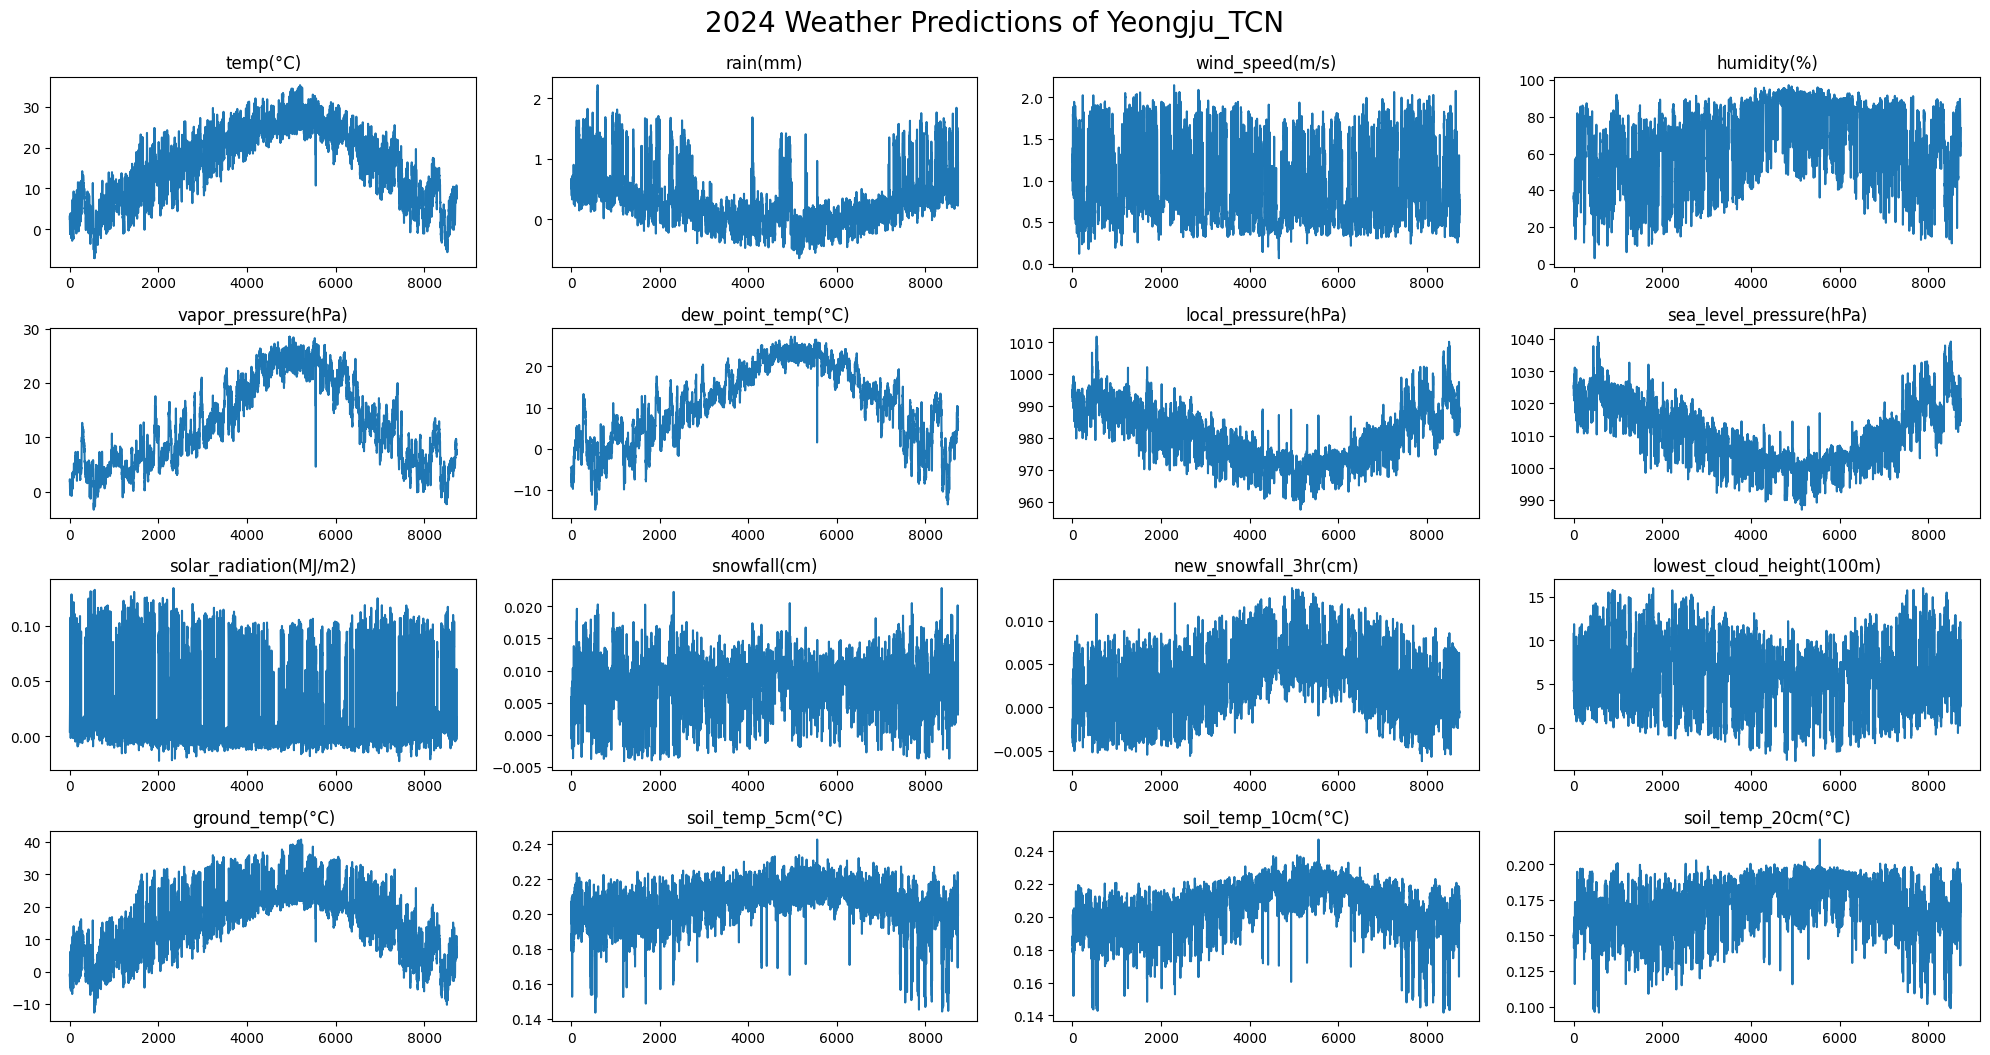

In [ ]:
final_tcn_df_without_location_youngju = final_predictions_youngju_tcn_df.drop([
    'location_name',
    'location',
    'datetime',
    'wind_direction(16pts)',
    'sunshine(hr)',
    'low_mid_cloud_cover(1/10)',
    'visibility(10m)',
    'total_cloud_cover(1/10)',
    'soil_temp_30cm(°C)',
    'latitude',
    'longitude',
    'station_elevation(m)',
    'barometer_height(m)',
    'thermometer_height(m)',
    'anemometer_height(m)',
    'rain_gauge_height(m)'
    ], axis=1)

n_rows = 6
n_cols = 4

plt.figure(figsize=(20, 15))


for i in range(final_tcn_df_without_location_youngju.shape[1]):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(final_tcn_df_without_location_youngju.iloc[:, i])
    plt.title(final_tcn_df_without_location_youngju.columns[i])

plt.tight_layout()
plt.suptitle("2024 Weather Predictions of Yeongju_TCN", fontsize=20, y=1.02)
plt.show()

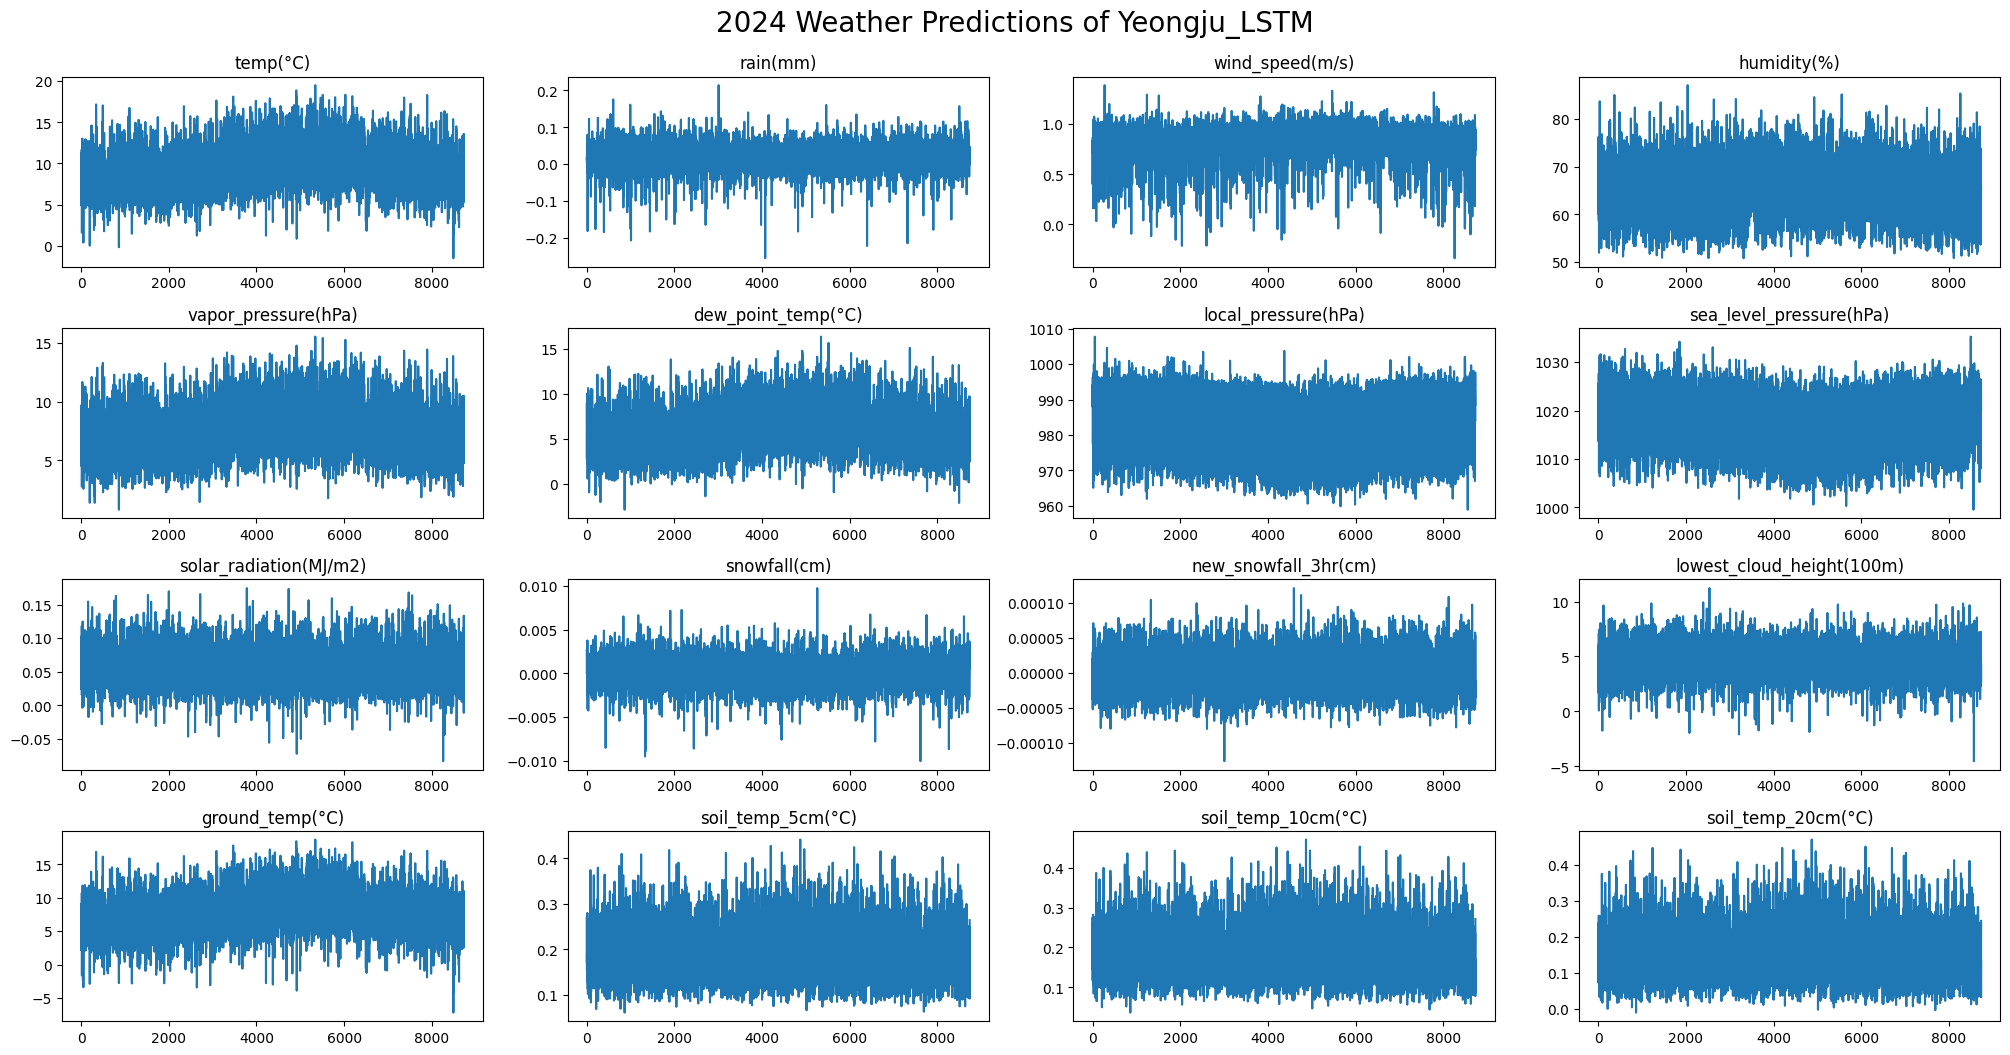

In [ ]:
final_lstm_df_without_location_youngju = final_predictions_youngju_lstm_df.drop([
    'location_name',
    'location',
    'datetime',
    'wind_direction(16pts)',
    'sunshine(hr)',
    'low_mid_cloud_cover(1/10)',
    'visibility(10m)',
    'total_cloud_cover(1/10)',
    'soil_temp_30cm(°C)',
    'latitude',
    'longitude',
    'station_elevation(m)',
    'barometer_height(m)',
    'thermometer_height(m)',
    'anemometer_height(m)',
    'rain_gauge_height(m)'
    ], axis=1)

n_rows = 6
n_cols = 4

plt.figure(figsize=(20, 15))


for i in range(final_lstm_df_without_location_youngju.shape[1]):
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(final_lstm_df_without_location_youngju.iloc[:, i])
    plt.title(final_lstm_df_without_location_youngju.columns[i])

plt.tight_layout()
plt.suptitle("2024 Weather Predictions of Yeongju_LSTM", fontsize=20, y=1.02)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_data_youngju = pd.read_csv('/content/drive/MyDrive/DB Economy Competition/영주 실제값.csv', encoding = 'cp949')
actual_data_youngju['일시'] = pd.to_datetime(actual_data_youngju['일시'])

actual_data_youngju.drop([
    '기온 QC플래그',
    '강수량 QC플래그',
    '풍속 QC플래그',
    '풍향 QC플래그',
    '습도 QC플래그',
    '현지기압 QC플래그',
    '해면기압 QC플래그',
    '일조 QC플래그',
    '일사 QC플래그',
    '지면상태(지면상태코드)',
    '현상번호(국내식)',
    '운형(운형약어)',
    '지면온도 QC플래그'], axis = 1, inplace=True)

actual_data_youngju.columns

Index(['지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
       '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [ ]:
actual_data_youngju.rename(columns={
    '지점': 'location',
    '지점명': 'location_name',
    '일시': 'datetime',
    '기온(°C)': 'temp(°C)',
    '강수량(mm)': 'rain(mm)',
    '풍속(m/s)': 'wind_speed(m/s)',
    '풍향(16방위)': 'wind_direction(16pts)',
    '습도(%)': 'humidity(%)',
    '증기압(hPa)': 'vapor_pressure(hPa)',
    '이슬점온도(°C)': 'dew_point_temp(°C)',
    '현지기압(hPa)': 'local_pressure(hPa)',
    '해면기압(hPa)': 'sea_level_pressure(hPa)',
    '일조(hr)': 'sunshine(hr)',
    '일사(MJ/m2)': 'solar_radiation(MJ/m2)',
    '적설(cm)': 'snowfall(cm)',
    '3시간신적설(cm)': 'new_snowfall_3hr(cm)',
    '전운량(10분위)': 'total_cloud_cover(1/10)',
    '중하층운량(10분위)': 'low_mid_cloud_cover(1/10)',
    '최저운고(100m )': 'lowest_cloud_height(100m)',
    '시정(10m)': 'visibility(10m)',
    '지면온도(°C)': 'ground_temp(°C)',
    '5cm 지중온도(°C)': 'soil_temp_5cm(°C)',
    '10cm 지중온도(°C)': 'soil_temp_10cm(°C)',
    '20cm 지중온도(°C)': 'soil_temp_20cm(°C)',
    '30cm 지중온도(°C)': 'soil_temp_30cm(°C)'
                  }, inplace = True)

actual_data_youngju.fillna(0, inplace=True)

actual_values_youngju = actual_data_youngju['temp(°C)'].values

tcn_predictions_youngju = final_predictions_youngju_tcn_df['temp(°C)'].values[:744]
lstm_predictions_youngju = final_predictions_youngju_lstm_df['temp(°C)'].values[:744]

mse_tcn_youngju = mean_squared_error(actual_values_youngju, tcn_predictions_youngju)
rmse_tcn_youngju = np.sqrt(mse_tcn_youngju)
mse_lstm_youngju = mean_squared_error(actual_values_youngju, lstm_predictions_youngju)
rmse_lstm_youngju = np.sqrt(mse_lstm_youngju)

accuracy_tcn_youngju = calculate_accuracy_within_threshold(actual_values_youngju, tcn_predictions_youngju)
accuracy_lstm_youngju = calculate_accuracy_within_threshold(actual_values_youngju, lstm_predictions_youngju)

print(f"TCN - MSE: {mse_tcn_youngju}, RMSE: {rmse_tcn_youngju}, Accuracy within threshold: {accuracy_tcn_youngju}")
print(f"LSTM - MSE: {mse_lstm_youngju}, RMSE: {rmse_lstm_youngju}, Accuracy within threshold: {accuracy_lstm_youngju}")

TCN - MSE: 41.73203414202728, RMSE: 6.460033602236701, Accuracy within threshold: 0.01478494623655914
LSTM - MSE: 99.16452061883295, RMSE: 9.958138411311271, Accuracy within threshold: 0.002688172043010753
